<a href="https://colab.research.google.com/github/nidhishtk/Assignment_14_Decision-Trees/blob/main/Q1_company_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Problem Statement**
# A cloth manufacturing company is interested to know about the segment or attributes causes high sale.
## Approach - A decision tree can be built with target variable Sale (we will first convert it in categorical variable) & all other variable will be independent in the analysis.

In [ ]:
!pip install dataprep

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.9/9.9 MB 25.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 34.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.6/133.6 kB 14.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 28.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 61.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 52.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 764.0/764.0 kB 40.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.4/6.4 MB 41.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 50.8 MB/s eta 0:00:00
  Created wheel for sqlalchemy: filena

In [ ]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns
from collections import Counter
from imblearn.over_sampling import SMOTE,  ADASYN
from imblearn.combine import SMOTETomek, SMOTEENN
from imblearn.under_sampling import RandomUnderSampler
from imblearn.pipeline import Pipeline
from dataprep.eda import plot, plot_correlation, plot_missing, create_report
import plotly.express as px
from plotly.offline import plot as off
import plotly.figure_factory as ff
import plotly.io as pio
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.tree import  DecisionTreeClassifier
from sklearn import tree
from sklearn.metrics import f1_score, precision_score, recall_score, classification_report,confusion_matrix,accuracy_score, roc_auc_score, roc_curve, precision_recall_curve
from sklearn.model_selection import GridSearchCV, KFold, StratifiedKFold, cross_val_score, train_test_split, RandomizedSearchCV
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Import Dataset
from google.colab import files
df = files.upload()
df = pd.read_csv('Company_Data.csv')
df

Saving Company_Data.csv to Company_Data.csv


Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0     9.50        138      73           11         276    120       Bad   42   
1    11.22        111      48           16         260     83      Good   65   
2    10.06        113      35           10         269     80    Medium   59   
3     7.40        117     100            4         466     97    Medium   55   
4     4.15        141      64            3         340    128       Bad   38   
..     ...        ...     ...          ...         ...    ...       ...  ...   
395  12.57        138     108           17         203    128      Good   33   
396   6.14        139      23            3          37    120    Medium   55   
397   7.41        162      26           12         368    159    Medium   40   
398   5.94        100      79            7         284     95       Bad   50   
399   9.71        134      37            0          27    120      Good   49   

     Education Urban   US  
0           17   Yes  Yes  
1           10   Yes  Yes  
2           12   Yes  Yes  
3           14   Yes  Yes  
4           13   Yes   No  
..         ...   ...  ...  
395         14   Yes  Yes  
396         11    No  Yes  
397         18   Yes  Yes  
398         12   Yes  Yes  
399         16   Yes  Yes  

[400 rows x 11 columns]

## Data Exploration <a class="anchor" id="3"></a>

Before doing anything else with the data let's see if there are any null values (missing data) in any of the columns.

In [ ]:
df.isnull().any()

Sales          False
CompPrice      False
Income         False
Advertising    False
Population     False
Price          False
ShelveLoc      False
Age            False
Education      False
Urban          False
US             False
dtype: bool

In [ ]:
df.isnull().sum()

Sales          0
CompPrice      0
Income         0
Advertising    0
Population     0
Price          0
ShelveLoc      0
Age            0
Education      0
Urban          0
US             0
dtype: int64

- We have no missing data so all the entries are valid for use.

- Now we can check the column names to get a better understanding of what features we will be basing our classification on.

###Descriptive Analysis<a class="anchor" id="3.1"></a>

In [ ]:
df.shape

(400, 11)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sales        400 non-null    float64
 1   CompPrice    400 non-null    int64  
 2   Income       400 non-null    int64  
 3   Advertising  400 non-null    int64  
 4   Population   400 non-null    int64  
 5   Price        400 non-null    int64  
 6   ShelveLoc    400 non-null    object 
 7   Age          400 non-null    int64  
 8   Education    400 non-null    int64  
 9   Urban        400 non-null    object 
 10  US           400 non-null    object 
dtypes: float64(1), int64(7), object(3)
memory usage: 34.5+ KB


In [ ]:
df[df.duplicated()].shape

(0, 11)

In [ ]:
df[df.duplicated()]

Empty DataFrame
Columns: [Sales, CompPrice, Income, Advertising, Population, Price, ShelveLoc, Age, Education, Urban, US]
Index: []

In [ ]:
df.describe()

Sales   CompPrice      Income  Advertising  Population  \
count  400.000000  400.000000  400.000000   400.000000  400.000000   
mean     7.496325  124.975000   68.657500     6.635000  264.840000   
std      2.824115   15.334512   27.986037     6.650364  147.376436   
min      0.000000   77.000000   21.000000     0.000000   10.000000   
25%      5.390000  115.000000   42.750000     0.000000  139.000000   
50%      7.490000  125.000000   69.000000     5.000000  272.000000   
75%      9.320000  135.000000   91.000000    12.000000  398.500000   
max     16.270000  175.000000  120.000000    29.000000  509.000000   

            Price         Age   Education  
count  400.000000  400.000000  400.000000  
mean   115.795000   53.322500   13.900000  
std     23.676664   16.200297    2.620528  
min     24.000000   25.000000   10.000000  
25%    100.000000   39.750000   12.000000  
50%    117.000000   54.500000   14.000000  
75%    131.000000   66.000000   16.000000  
max    191.000000   80.000000   18.000000

The features are not on the same scale. For example `Population` has a mean of `	264.84` and `Advertising` has a mean value of `6.63`. Features should be on the same scale for algorithms such as logistic regression (gradient descent) to converge smoothly. Let's go ahead and check further.

### Feature Engineering<a class="anchor" id="3.2"></a>

In [ ]:
df.Sales.describe()

count    400.000000
mean       7.496325
std        2.824115
min        0.000000
25%        5.390000
50%        7.490000
75%        9.320000
max       16.270000
Name: Sales, dtype: float64

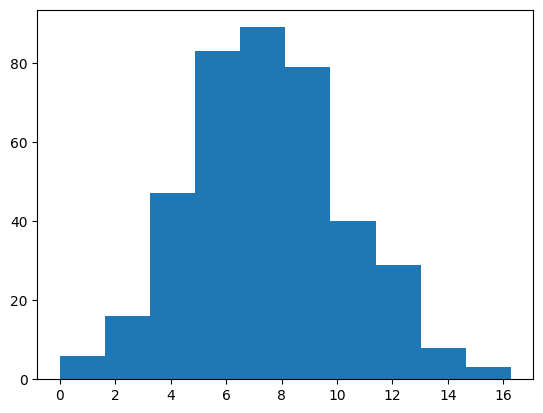

In [ ]:
plt.hist('Sales',data=df)
plt.show()

####  As the Sales distribution is not skewed and it is normal distribution we can take mean or median as a threshold to make two or three categories 'Low', 'Medium' and 'High' Sales
### For two categories lets assume: Sales < 7.5 as “Bad=0” and Sales > 7.5 as “Good=1”
### and For three categories lets divide the Sales values with Quartiles , less than first quartile as 'Low' , between Second Quartile as 'Medium and above Third Quartile as 'High'

In [ ]:
df.Sales.max()

16.27

In [ ]:
16.270000/3

5.423333333333333

In [ ]:
5.423333333333333*2

10.846666666666666

In [ ]:
5.423333333333333*3

16.27

In [ ]:
# Converting taxable_income <= 30000 as "Risky" and others are "Good"
df1=df.copy()
df1['Sales_cat'] = pd.cut(x = df1['Sales'], bins = [0,5.39,9.32,17], labels=['Low','Medium','High'], right = False)
df1.head()

Sales  CompPrice  Income  Advertising  Population  Price ShelveLoc  Age  \
0   9.50        138      73           11         276    120       Bad   42   
1  11.22        111      48           16         260     83      Good   65   
2  10.06        113      35           10         269     80    Medium   59   
3   7.40        117     100            4         466     97    Medium   55   
4   4.15        141      64            3         340    128       Bad   38   

   Education Urban   US Sales_cat  
0         17   Yes  Yes      High  
1         10   Yes  Yes      High  
2         12   Yes  Yes      High  
3         14   Yes  Yes    Medium  
4         13   Yes   No       Low

In [ ]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   Sales        400 non-null    float64 
 1   CompPrice    400 non-null    int64   
 2   Income       400 non-null    int64   
 3   Advertising  400 non-null    int64   
 4   Population   400 non-null    int64   
 5   Price        400 non-null    int64   
 6   ShelveLoc    400 non-null    object  
 7   Age          400 non-null    int64   
 8   Education    400 non-null    int64   
 9   Urban        400 non-null    object  
 10  US           400 non-null    object  
 11  Sales_cat    400 non-null    category
dtypes: category(1), float64(1), int64(7), object(3)
memory usage: 35.0+ KB


In [ ]:
categorical_features = df1.describe(include=["object",'category']).columns
categorical_features

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')

In [ ]:
numerical_features = df1.describe(include=["int64","float64"]).columns
numerical_features

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'Age', 'Education'],
      dtype='object')

## Data Visualization<a class="anchor" id="4"></a>

+ ###  Univariate plots<a class="anchor" id="4.1"></a>

Next let's get the distribution of animal data across the types of classes.

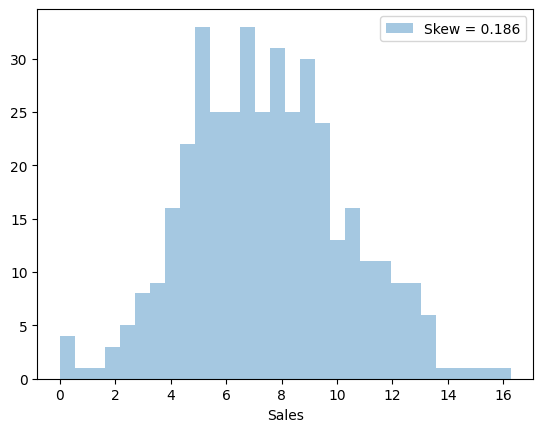

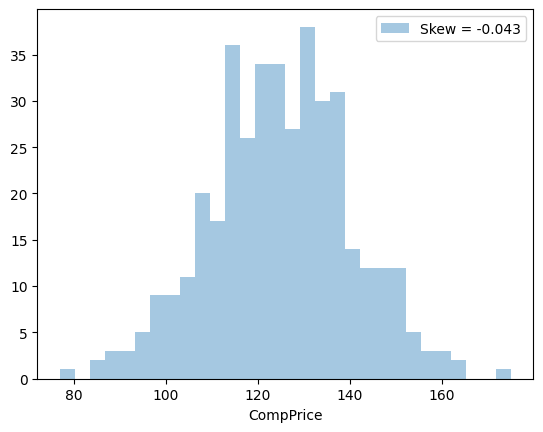

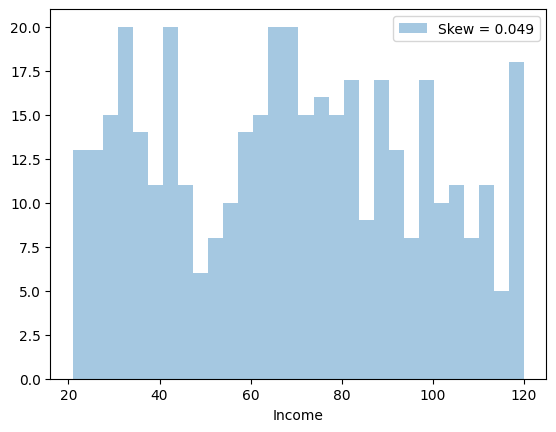

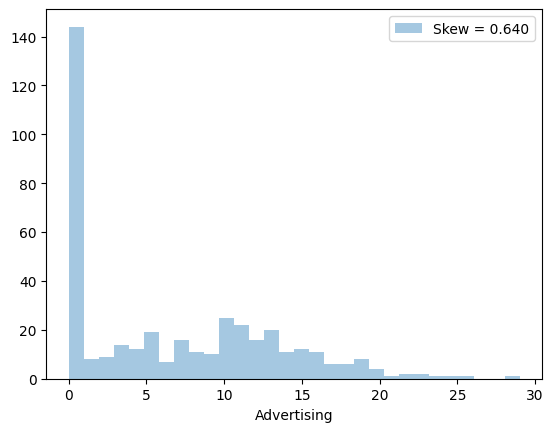

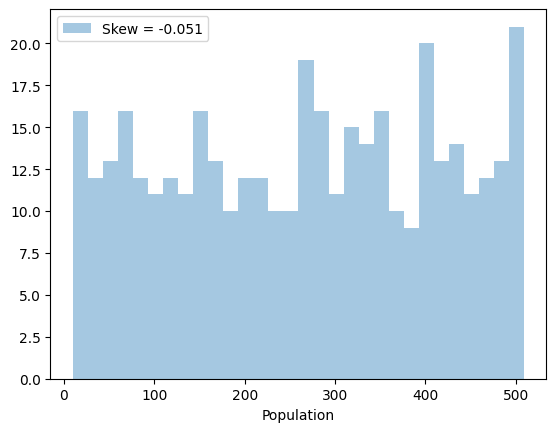

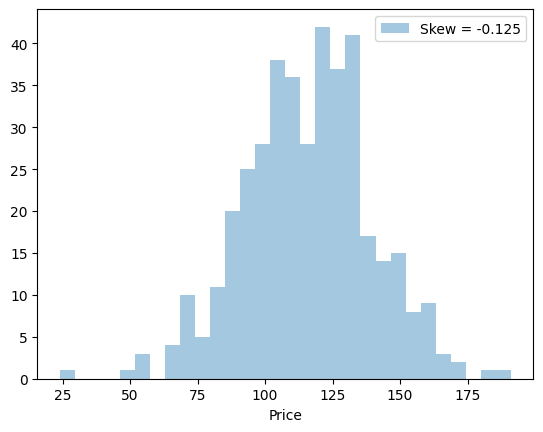

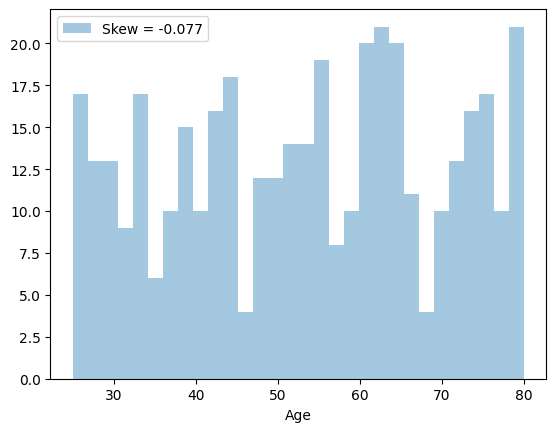

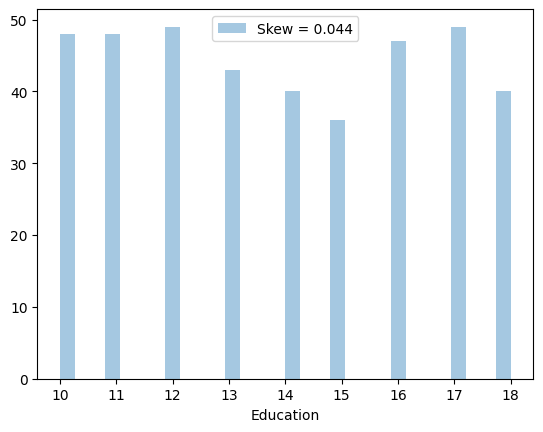

In [ ]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes != 'O']
for feat in numerical_features:
    skew = df[feat].skew()
    sns.distplot(df[feat], kde= False, label='Skew = %.3f' %(skew), bins=30)
    plt.legend(loc='best')
    plt.show()

None of the features is normally distributed. The features Fe, Ba, Ca and K exhibit the highest skew coefficients. Moreover, the distribution of potassium (K) and Barium (Ba) seem to contain many outliers. Let's identify the indices of the observations containing outliers using Turkey's method.

In [ ]:
# Detect observations with more than one outlier

def outlier_hunt(df):
    """
    Takes a dataframe df of features and returns a list of the indices
    corresponding to the observations containing more than 2 outliers.
    """
    outlier_indices = []

    # iterate over features(columns)
    for col in df.columns.tolist():
        # 1st quartile (25%)
        Q1 = np.percentile(df[col], 25)

        # 3rd quartile (75%)
        Q3 = np.percentile(df[col],75)

        # Interquartile rrange (IQR)
        IQR = Q3 - Q1

        # outlier step
        outlier_step = 1.5 * IQR

        # Determine a list of indices of outliers for feature col
        outlier_list_col = df[(df[col] < Q1 - outlier_step) | (df[col] > Q3 + outlier_step )].index

        # append the found outlier indices for col to the list of outlier indices
        outlier_indices.extend(outlier_list_col)

    # select observations containing more than 2 outliers
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list( k for k, v in outlier_indices.items() if v > 2 )

    return multiple_outliers

print('The dataset contains %d observations with more than 2 outliers' %(len(outlier_hunt(df[numerical_features]))))

The dataset contains 0 observations with more than 2 outliers


##### Mmm hmm! there exists no observations with multiple outliers.

Let's examine the boxplots for the several distributions

In [ ]:
numerical_features

['Sales',
 'CompPrice',
 'Income',
 'Advertising',
 'Population',
 'Price',
 'Age',
 'Education']

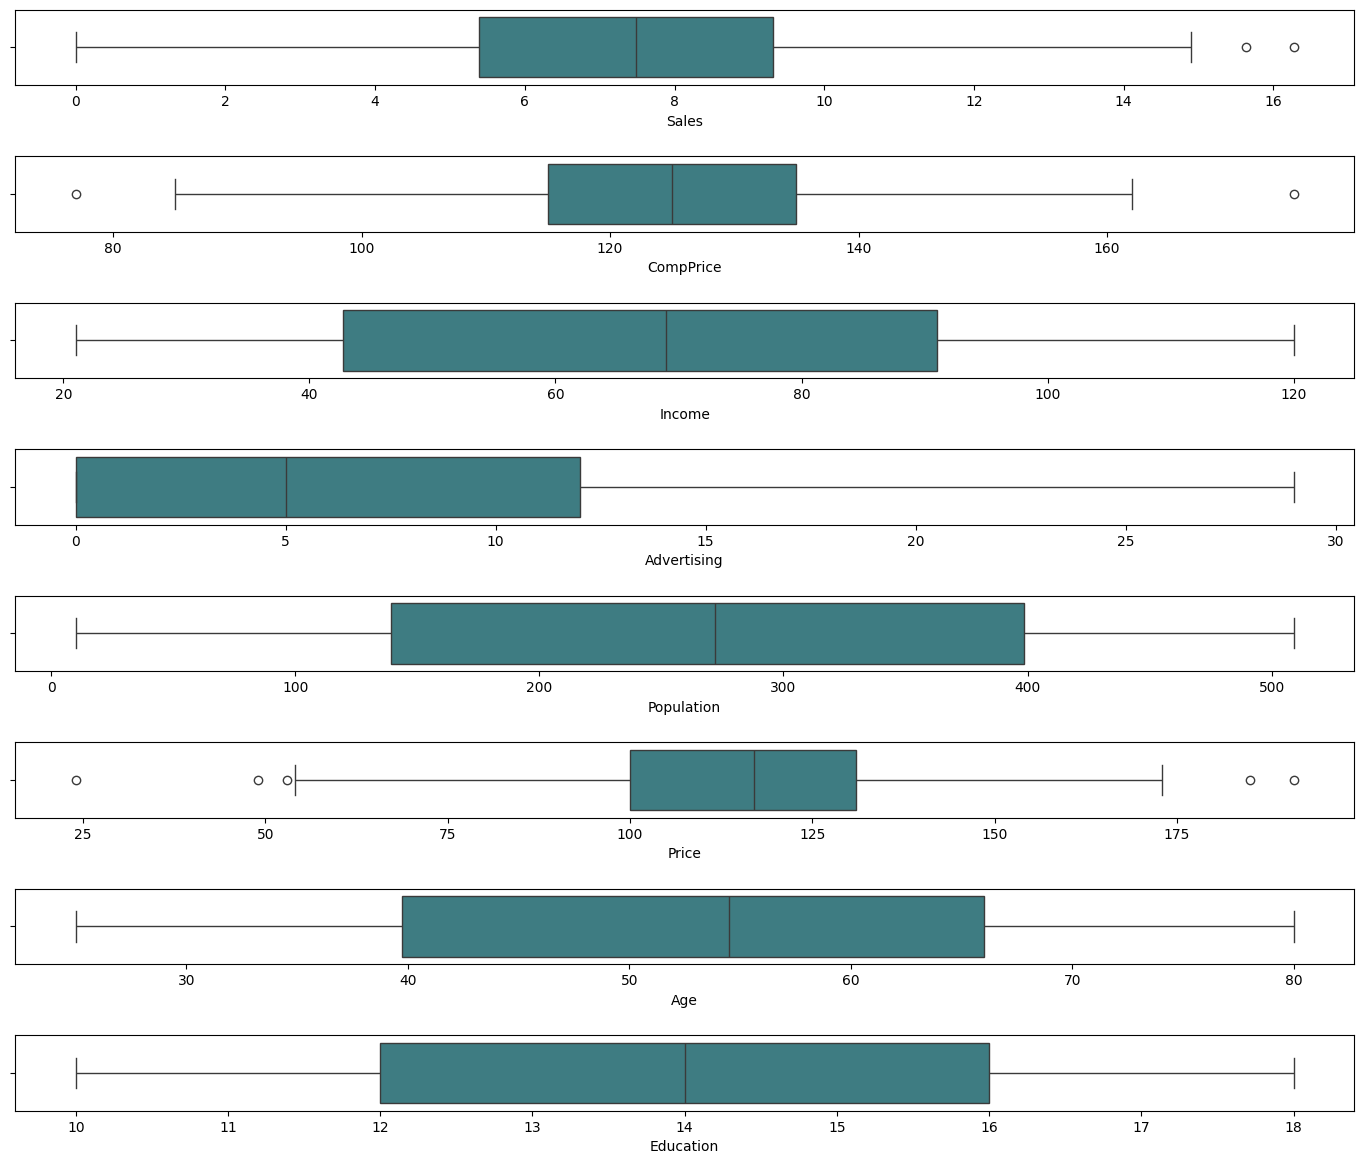

In [ ]:
ot=df.copy()
fig, axes=plt.subplots(8,1,figsize=(14,12),sharex=False,sharey=False)
sns.boxplot(x='Sales',data=ot,palette='crest',ax=axes[0])
sns.boxplot(x='CompPrice',data=ot,palette='crest',ax=axes[1])
sns.boxplot(x='Income',data=ot,palette='crest',ax=axes[2])
sns.boxplot(x='Advertising',data=ot,palette='crest',ax=axes[3])
sns.boxplot(x='Population',data=ot,palette='crest',ax=axes[4])
sns.boxplot(x='Price',data=ot,palette='crest',ax=axes[5])
sns.boxplot(x='Age',data=ot,palette='crest',ax=axes[6])
sns.boxplot(x='Education',data=ot,palette='crest',ax=axes[7])
plt.tight_layout(pad=2.0)

<Axes: >

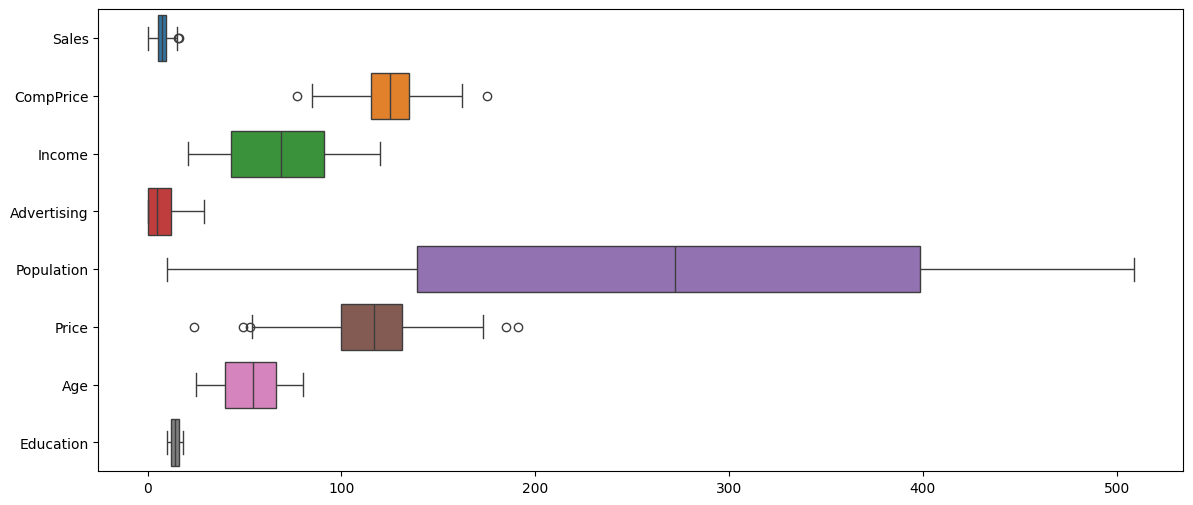

In [ ]:
#outlier
plt.figure(figsize=(14,6))
sns.boxplot(data=df[numerical_features], orient="h")

#### Unsurprisingly, **`Population`** has a mean that is much superior to the other constituents as we already saw in the previous section.

+ ### Multivariate Analysis<a class="anchor" id="4.2"></a>


Let's now proceed by drawing a pairplot to visually examine the correlation between the features.

<Figure size 800x800 with 0 Axes>

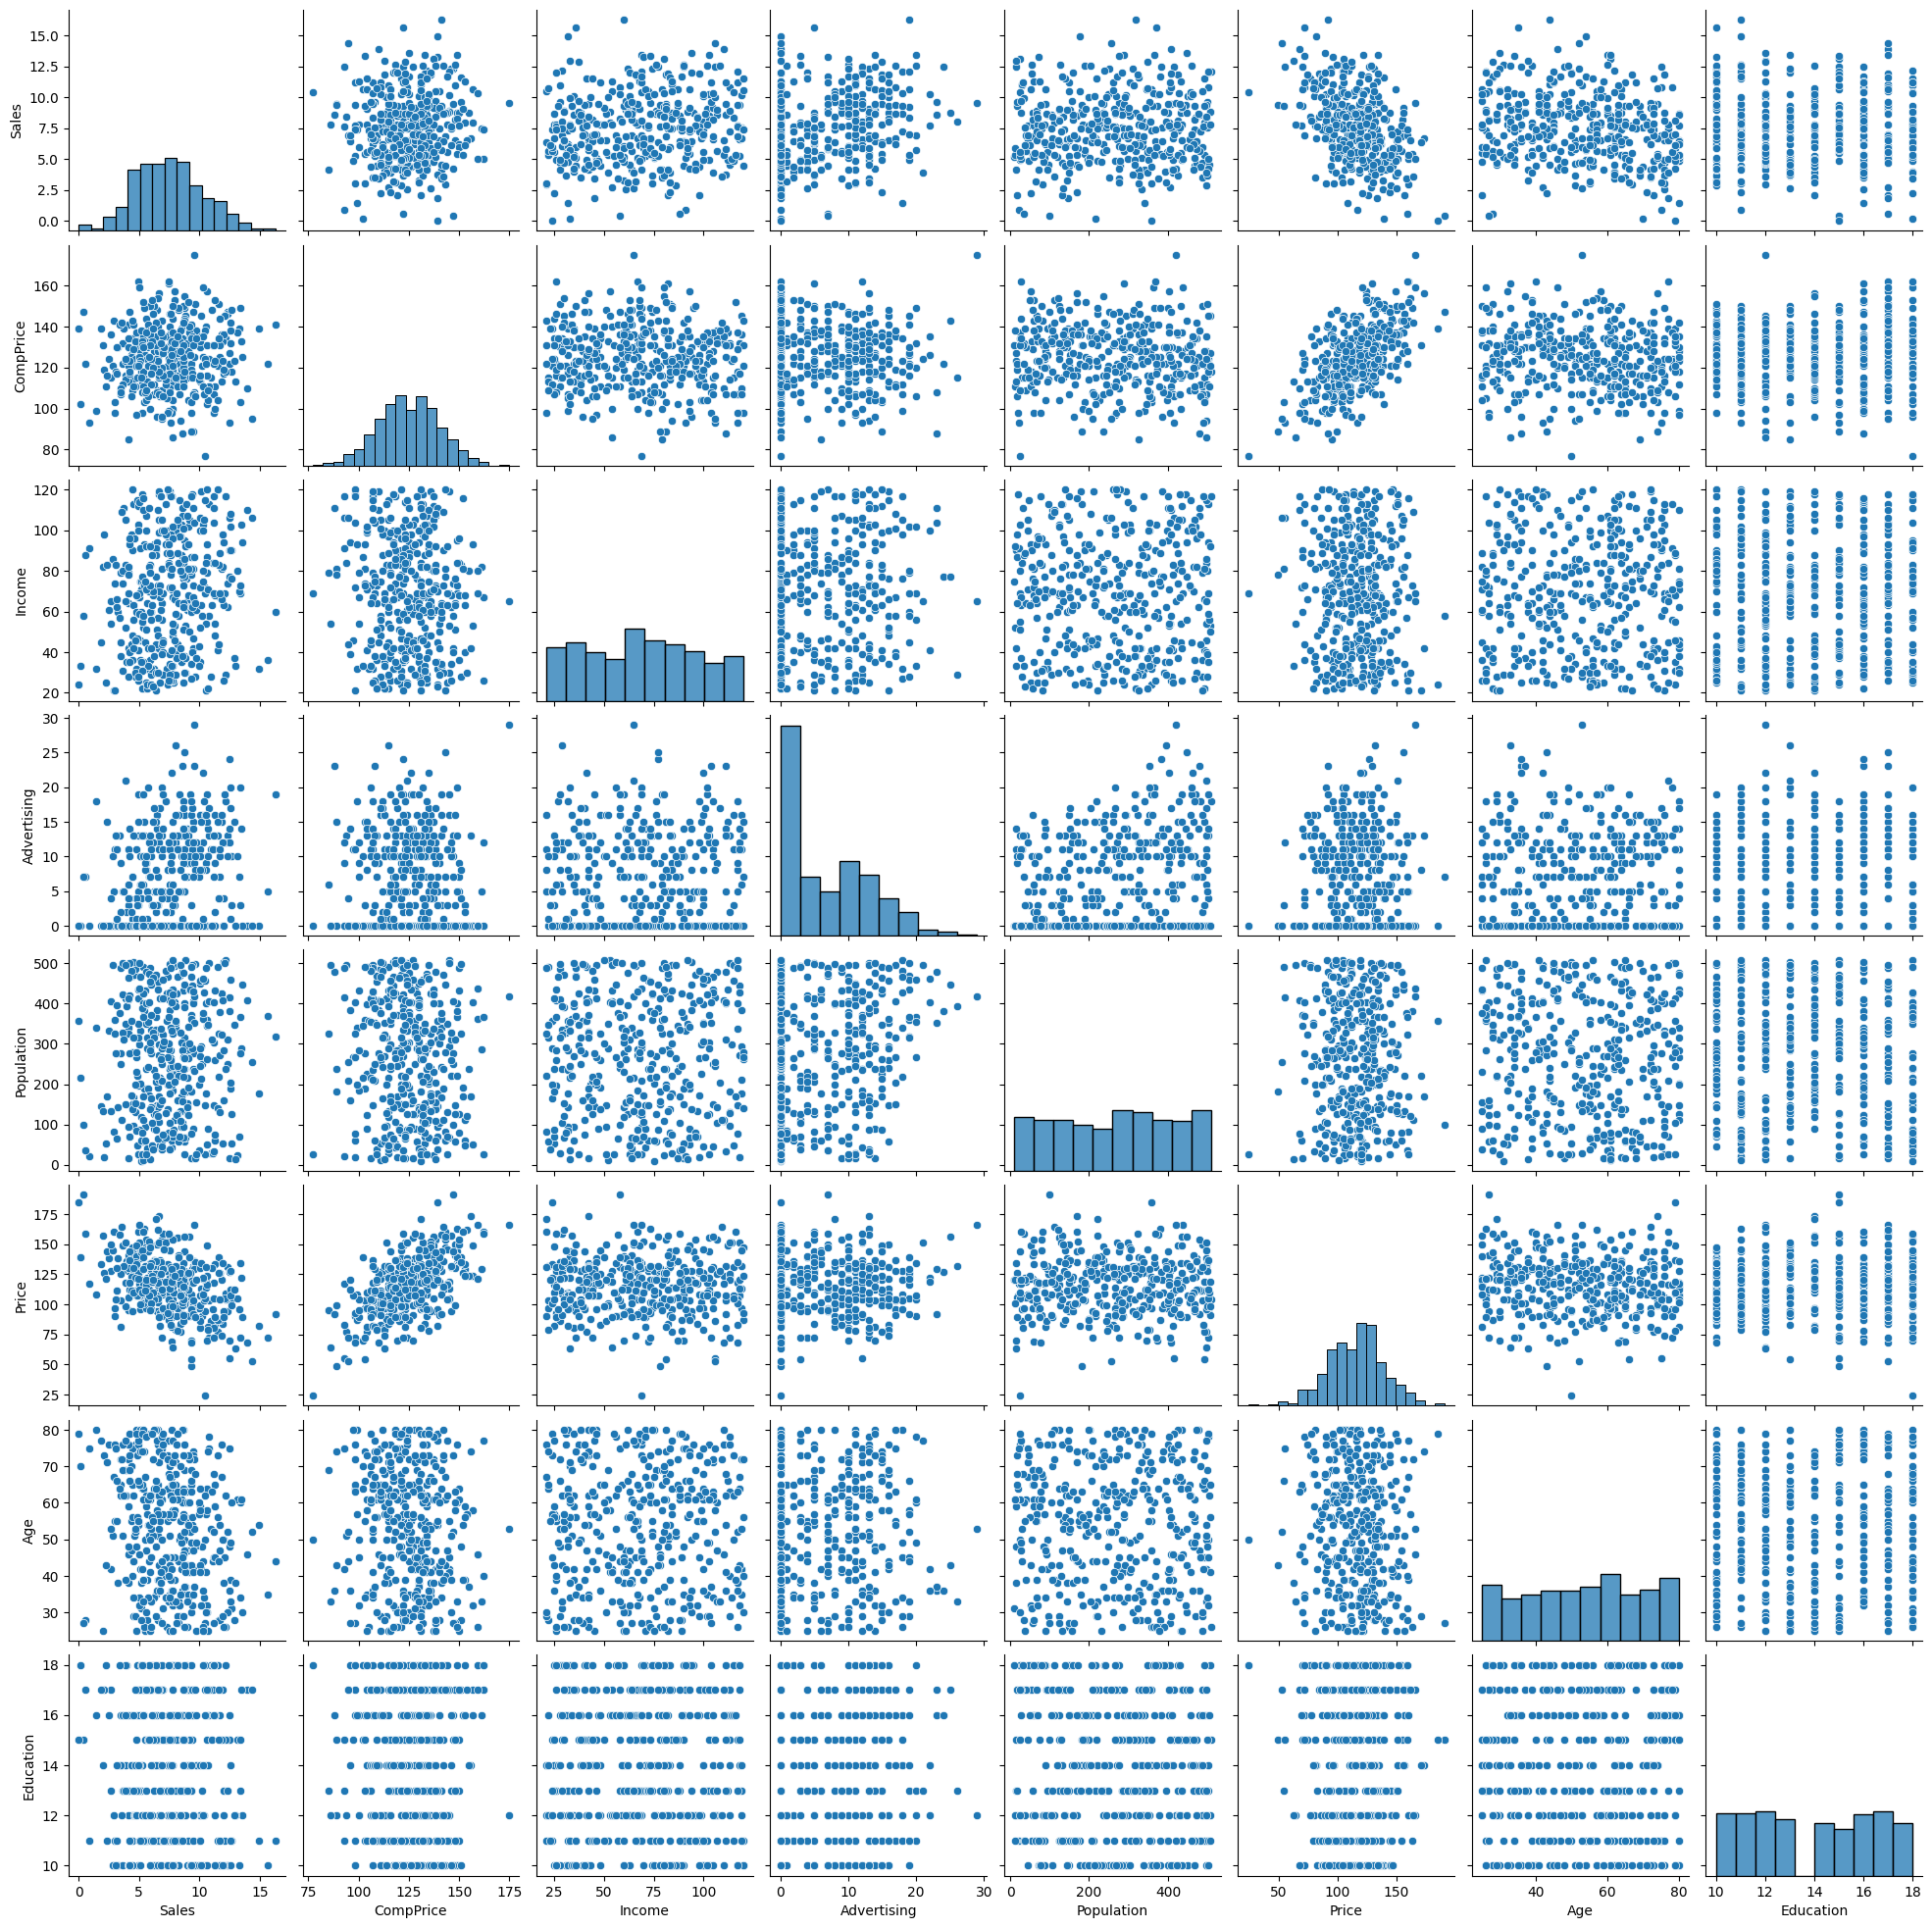

In [ ]:
plt.figure(figsize=(8,8))
sns.pairplot(df, palette='coolwarm')
plt.show()

***Pearson's Correlation Coefficient***: helps you find out the relationship between two quantities. It gives you the measure of the strength of association between two variables. The value of Pearson's Correlation Coefficient can be between -1 to +1. 1 means that they are highly correlated and 0 means no correlation.

A heat map is a two-dimensional representation of information with the help of colors. Heat maps can help the user visualize simple or complex information.

<Axes: >

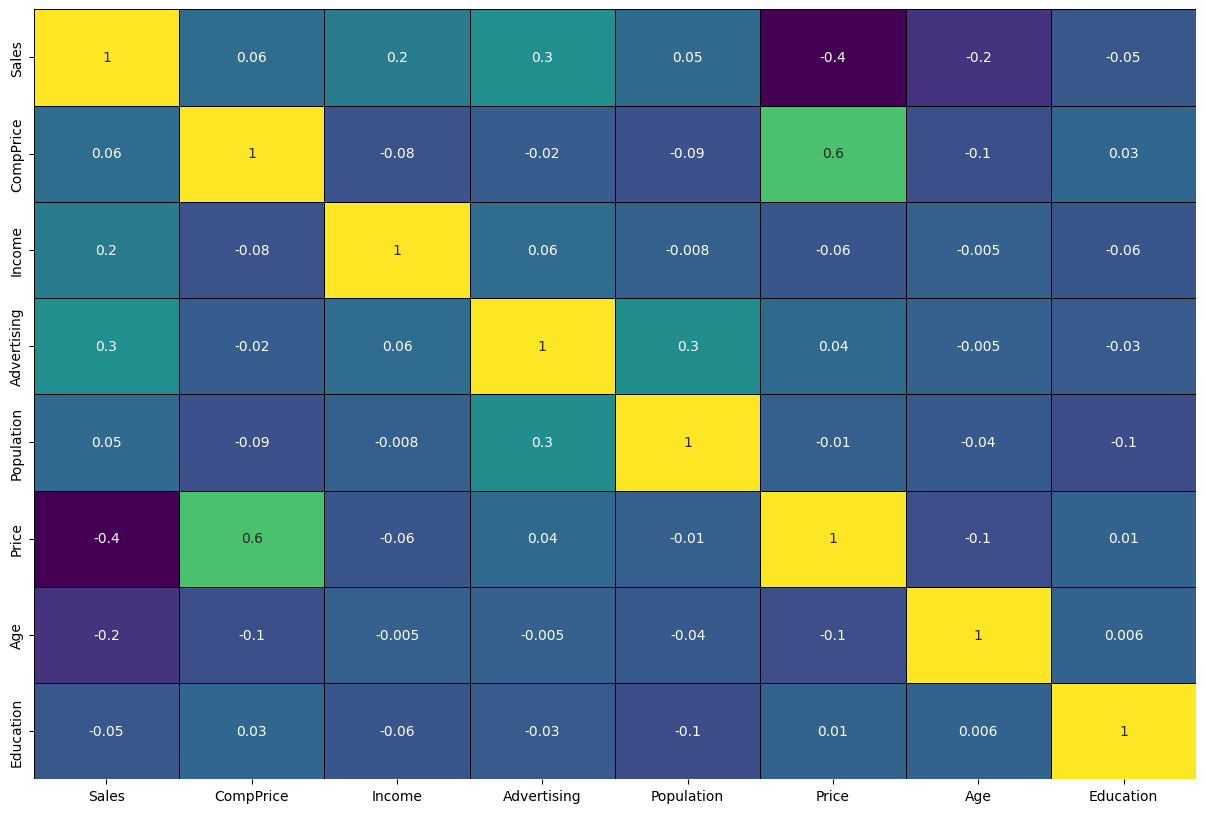

In [ ]:
# Having a look at the correlation matrix

fig, ax = plt.subplots(figsize=(15,10))
sns.heatmap(df.corr(), annot=True, fmt='.1g', cmap="viridis", cbar=False, linewidths=0.5, linecolor='black')

Index(['ShelveLoc', 'Urban', 'US', 'Sales_cat'], dtype='object')


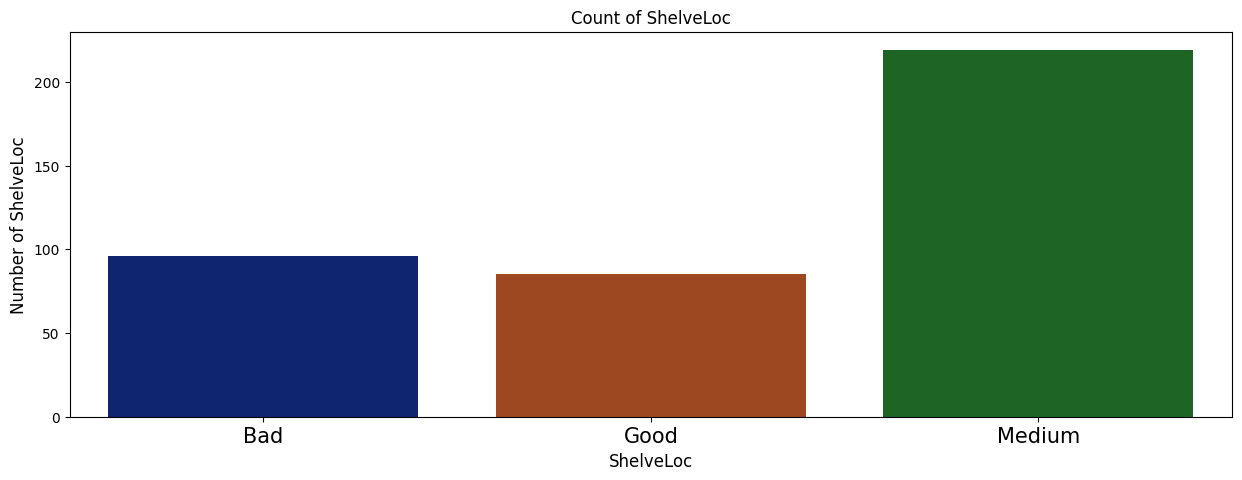

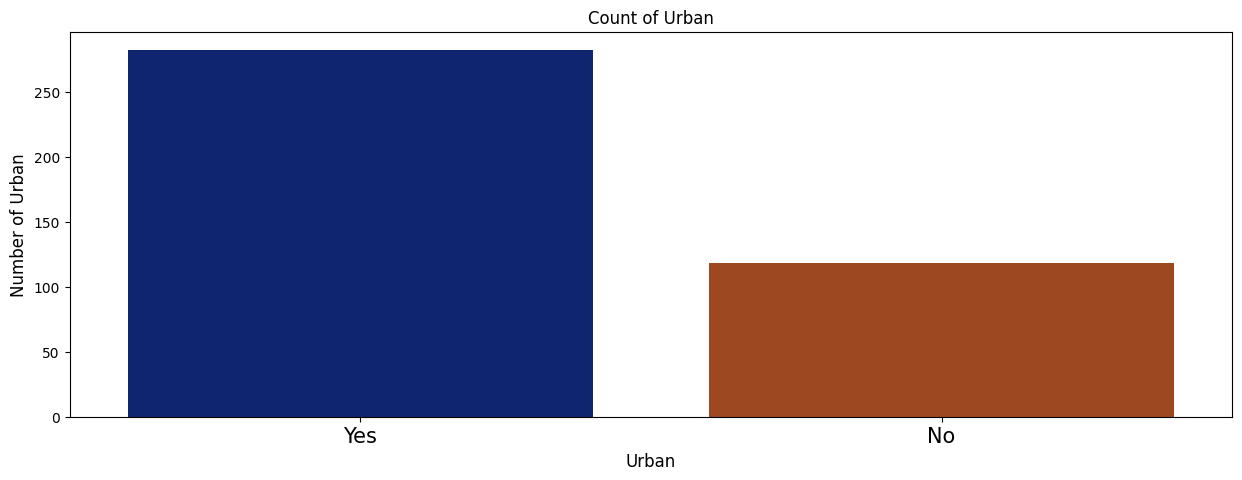

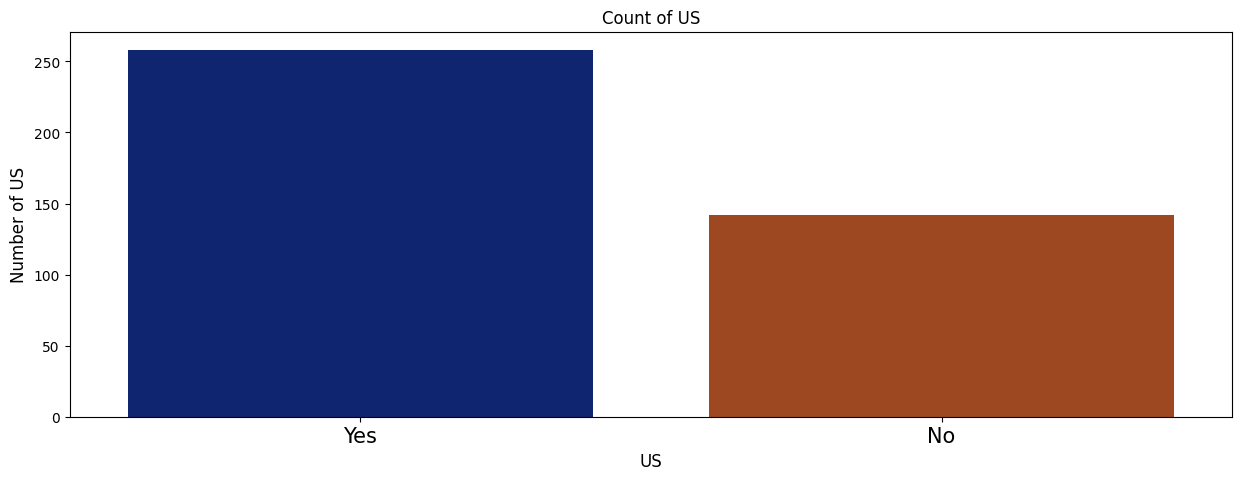

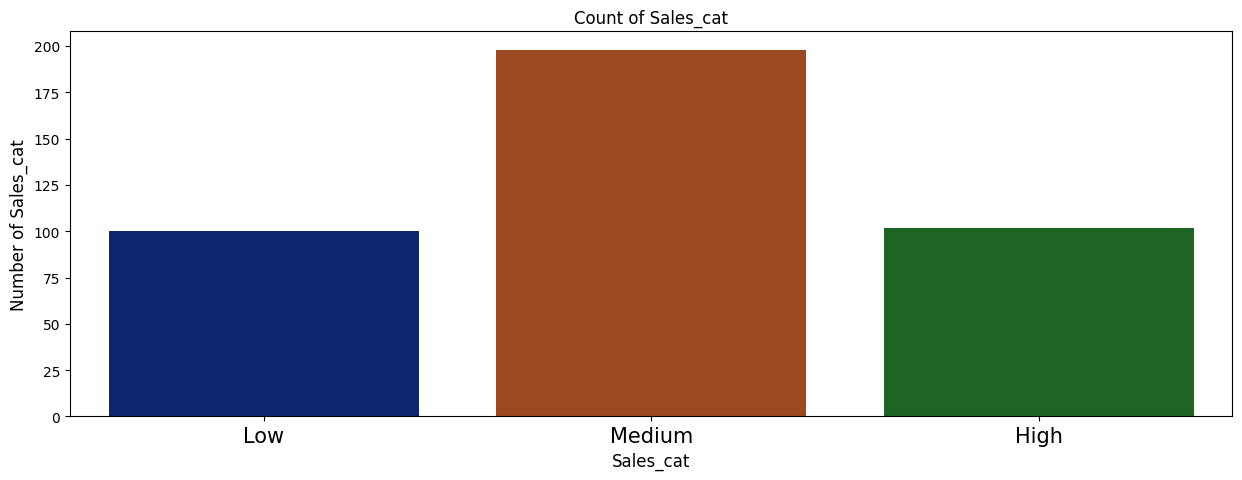

In [ ]:
print(categorical_features)

for idx, column in enumerate(categorical_features):
    plt.figure(figsize=(15, 5))
    unique = df1[column].value_counts(ascending=True);

    #plt.subplot(1, len(categorical_features), idx+1)
    plt.title("Count of "+ column)
    sns.countplot(data=df1, x=column,palette = "dark")
    #plt.bar(unique.index, unique.values);
    plt.xticks(rotation = 0, size = 15)

    plt.xlabel(column, fontsize=12)
    plt.ylabel("Number of "+ column, fontsize=12)

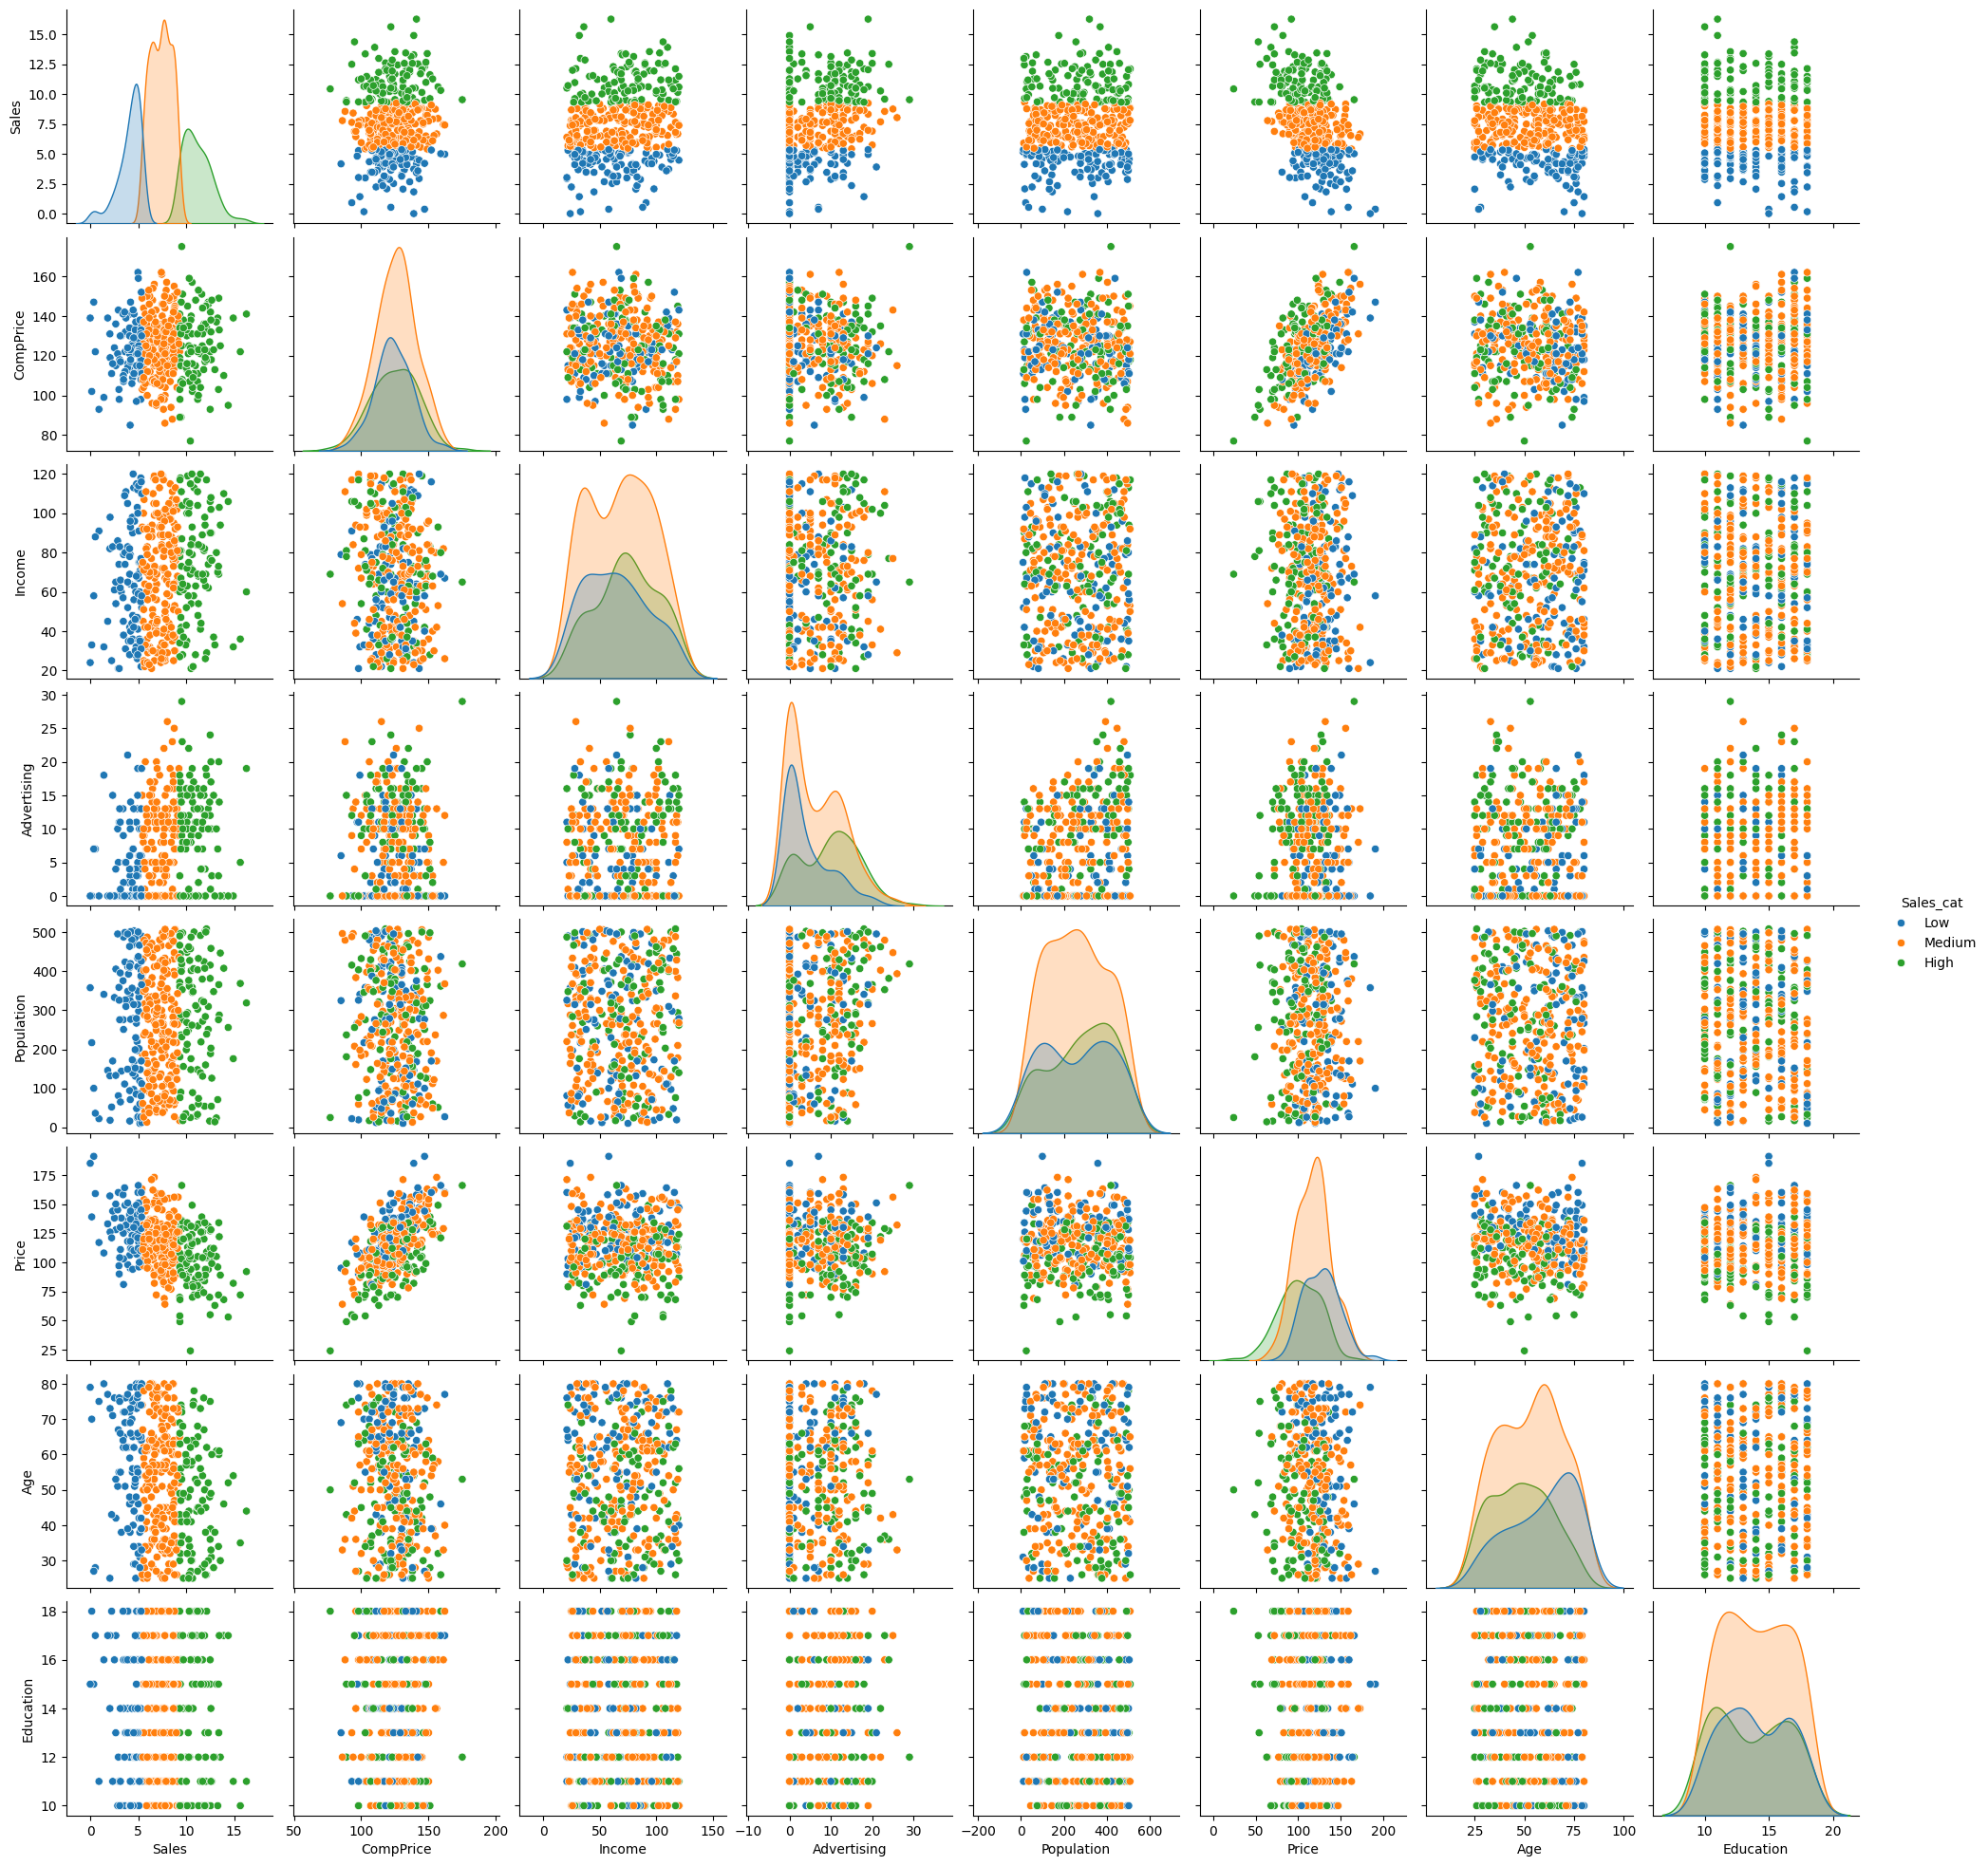

In [ ]:
# let's plot pair plot to visualise the attributes all at once
import seaborn as sns
sns.pairplot(data=df1, hue = 'Sales_cat')

In [ ]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

Text(0.5, 1.0, 'Correlation with Sales \n')

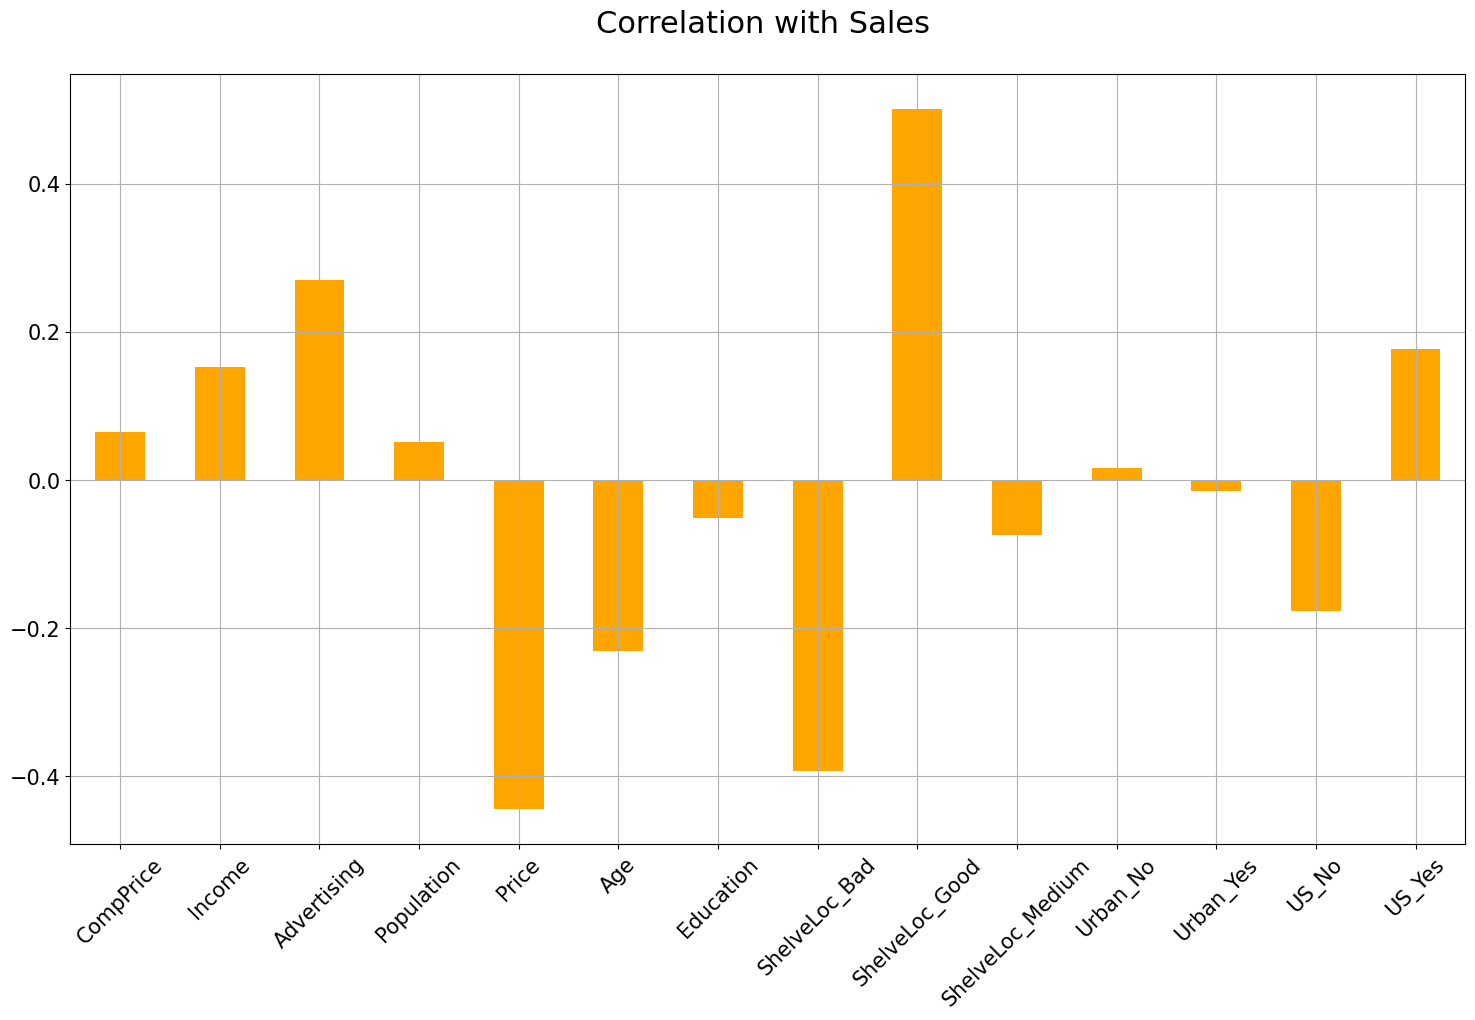

In [ ]:
data2 = data_.copy()

correlations = data2.corrwith(df1.Sales)
correlations = correlations[correlations!=1]
positive_correlations = correlations[correlations >0].sort_values(ascending = False)
negative_correlations =correlations[correlations<0].sort_values(ascending = False)

correlations.plot.bar(
        figsize = (18, 10),
        fontsize = 15,
        color = 'orange',
        rot = 45, grid = True)
plt.title('Correlation with Sales \n',
horizontalalignment="center", fontstyle = "normal",
fontsize = "22", fontfamily = "sans-serif")

#### Checking for Imbalanced or balanced dataset with regards to the Target

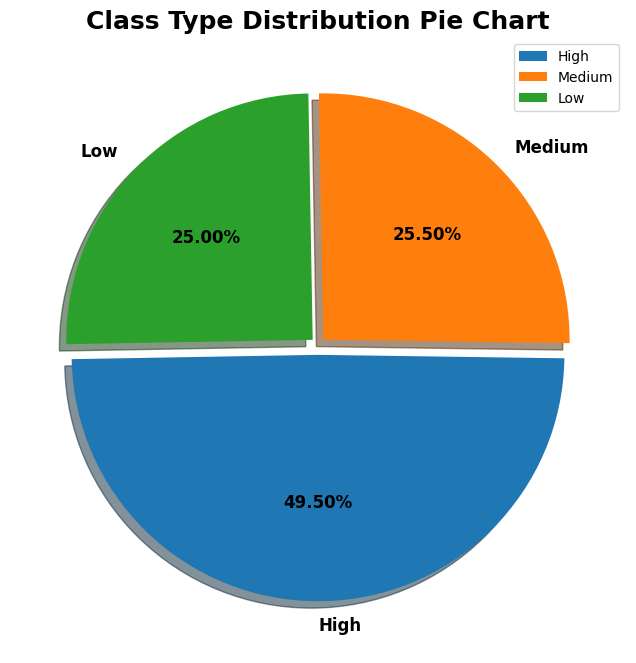

In [ ]:
plt.figure(figsize = (12,8))
plt.pie(df1['Sales_cat'].value_counts(),
       labels=df1.Sales_cat.unique(),
       explode = [0.04,0.03,0.03],
       autopct= '%.2f%%',
       shadow= True,
       startangle= 181,
       textprops = {'size':'large',
                   'fontweight':'bold',
                   'color':'black'})
plt.legend(loc= 'upper right')
plt.title("Class Type Distribution Pie Chart", fontsize = 18, fontweight = 'bold')
plt.show()

##### Imbalanced data refers to those types of datasets where the target class has an uneven distribution of observations, i.e one class label has a very high number of observations and the other has a very low number of observations.

Here, the class “High” is called the majority class, and the much smaller in size “Low” and “Medium” class is called the minority class.

In [ ]:
df1.Sales_cat.value_counts()

Medium    198
High      102
Low       100
Name: Sales_cat, dtype: int64

Text(0.5, 1.0, 'Low Medium or Good for Sales')

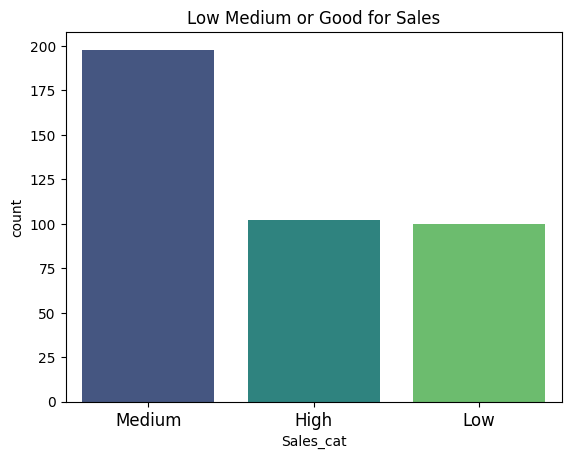

In [ ]:
sns.countplot(x='Sales_cat', data=df1, palette = 'viridis',
              order=df1['Sales_cat'].value_counts().index)
plt.xticks(fontsize = 12)
plt.title('Low Medium or Good for Sales')

### Problems with imbalanced data classification
If we explain it in a very simple manner, the main problem with imbalanced dataset prediction is how accurately are we actually predicting both majority and minority class?

Sometimes when the records of a certain class are much more than the other class, our classifier may get biased towards the prediction. In this case, the confusion matrix for the classification problem shows how well our model classifies the target classes and we arrive at the accuracy of the model from the confusion matrix.

It is calculated based on the total no of correct predictions by the model divided by the total no of predictions. In the an example case it is (0+95)/(0+95+0+5)=0.95 or 95%. It means that the model fails to identify the minority class yet the accuracy score of the model will be 95%

Thus our traditional approach of classification and model accuracy calculation is not useful in the case of the imbalanced dataset

###  Data Pre-Processing<a class="anchor" id="5.1"></a>

In [ ]:
data_ = df1.copy()
data_.drop('Sales',axis=1, inplace =True)
data_ = pd.get_dummies(data_.iloc[:,:-1])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  
0      0       1  
1      0       1  
2      0       1  
3      0       1  
4      1       0

In [ ]:
data_['Sales'] = df1.Sales_cat
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes   Sales  
0      0       1    High  
1      0       1    High  
2      0       1    High  
3      0       1  Medium  
4      1       0     Low

In [ ]:
le = LabelEncoder()
le.fit(data_["Sales"])
data_["Sales"]=le.transform(data_["Sales"])
data_.head()

CompPrice  Income  Advertising  Population  Price  Age  Education  \
0        138      73           11         276    120   42         17   
1        111      48           16         260     83   65         10   
2        113      35           10         269     80   59         12   
3        117     100            4         466     97   55         14   
4        141      64            3         340    128   38         13   

   ShelveLoc_Bad  ShelveLoc_Good  ShelveLoc_Medium  Urban_No  Urban_Yes  \
0              1               0                 0         0          1   
1              0               1                 0         0          1   
2              0               0                 1         0          1   
3              0               0                 1         0          1   
4              1               0                 0         0          1   

   US_No  US_Yes  Sales  
0      0       1      0  
1      0       1      0  
2      0       1      0  
3      0       1      2  
4      1       0      1

In [ ]:
# split into input (X) and output (y) variables
X = data_.iloc[:, :-1]

y=  data_.Sales

In [ ]:
#Feature importance
from numpy import set_printoptions
from sklearn.feature_selection import SelectKBest, chi2

In [ ]:
# feature extraction
test = SelectKBest(score_func=chi2, k=4)
fit = test.fit(X, y)

In [ ]:
# summarize scores
scores = fit.scores_

features = fit.transform(X)

In [ ]:
score_df = pd.DataFrame(list(zip(scores, X.columns)),
               columns =['Score', 'Feature'])
score_df.sort_values(by="Score", ascending=False, inplace=True)
score_df

Score           Feature
4   300.881058             Price
2   251.767458       Advertising
3   141.113336        Population
5   106.577639               Age
8    66.174919    ShelveLoc_Good
1    65.145403            Income
7    48.524460     ShelveLoc_Bad
12   13.109136             US_No
9     8.654770  ShelveLoc_Medium
13    7.215106            US_Yes
0     2.253637         CompPrice
6     0.689685         Education
10    0.163751          Urban_No
11    0.068520         Urban_Yes

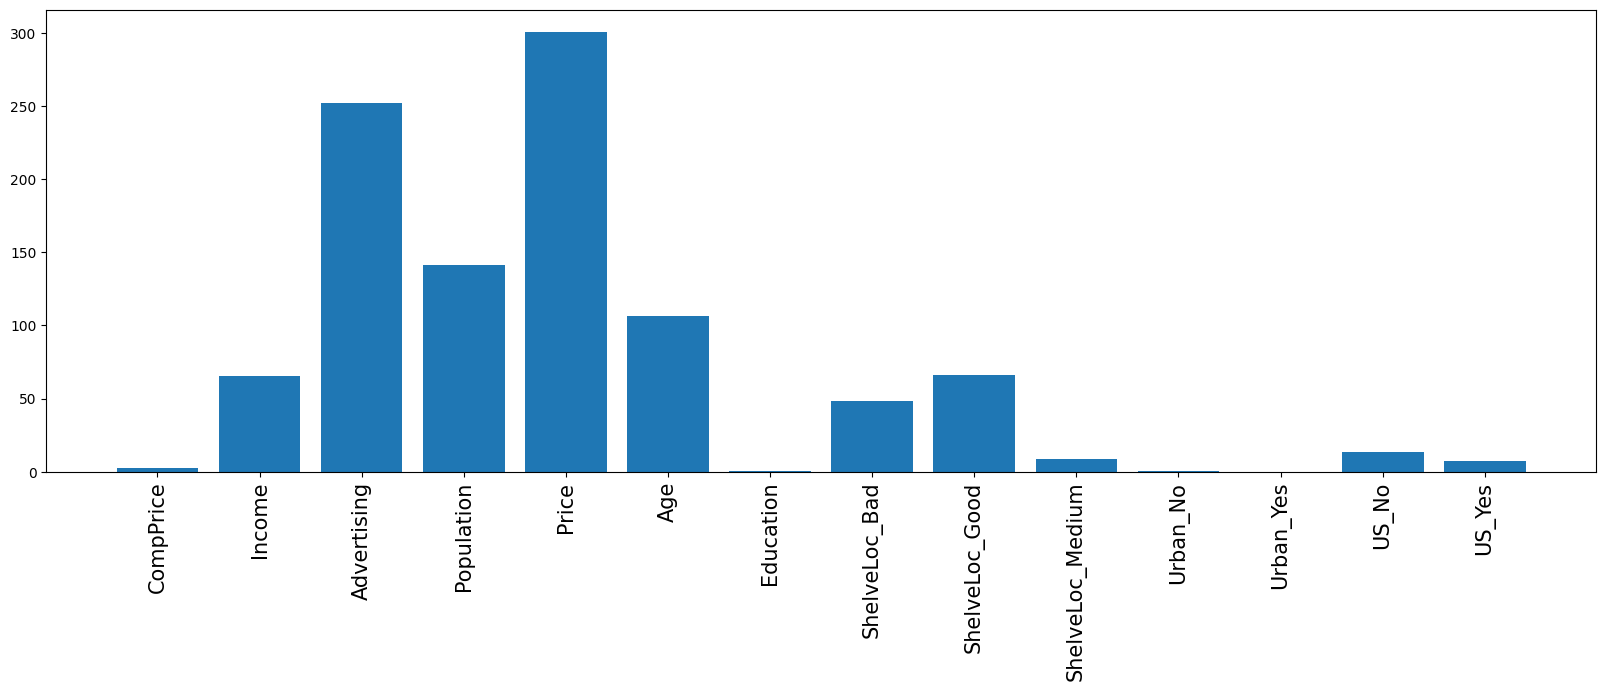

In [ ]:
fig, axes = plt.subplots(figsize=(20, 6))
plt.bar([i for i in range(len(scores))],scores)
axes.set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13])
axes.set_xticklabels(X.columns.values)
plt.xticks(rotation = 90, size = 15)
plt.show()

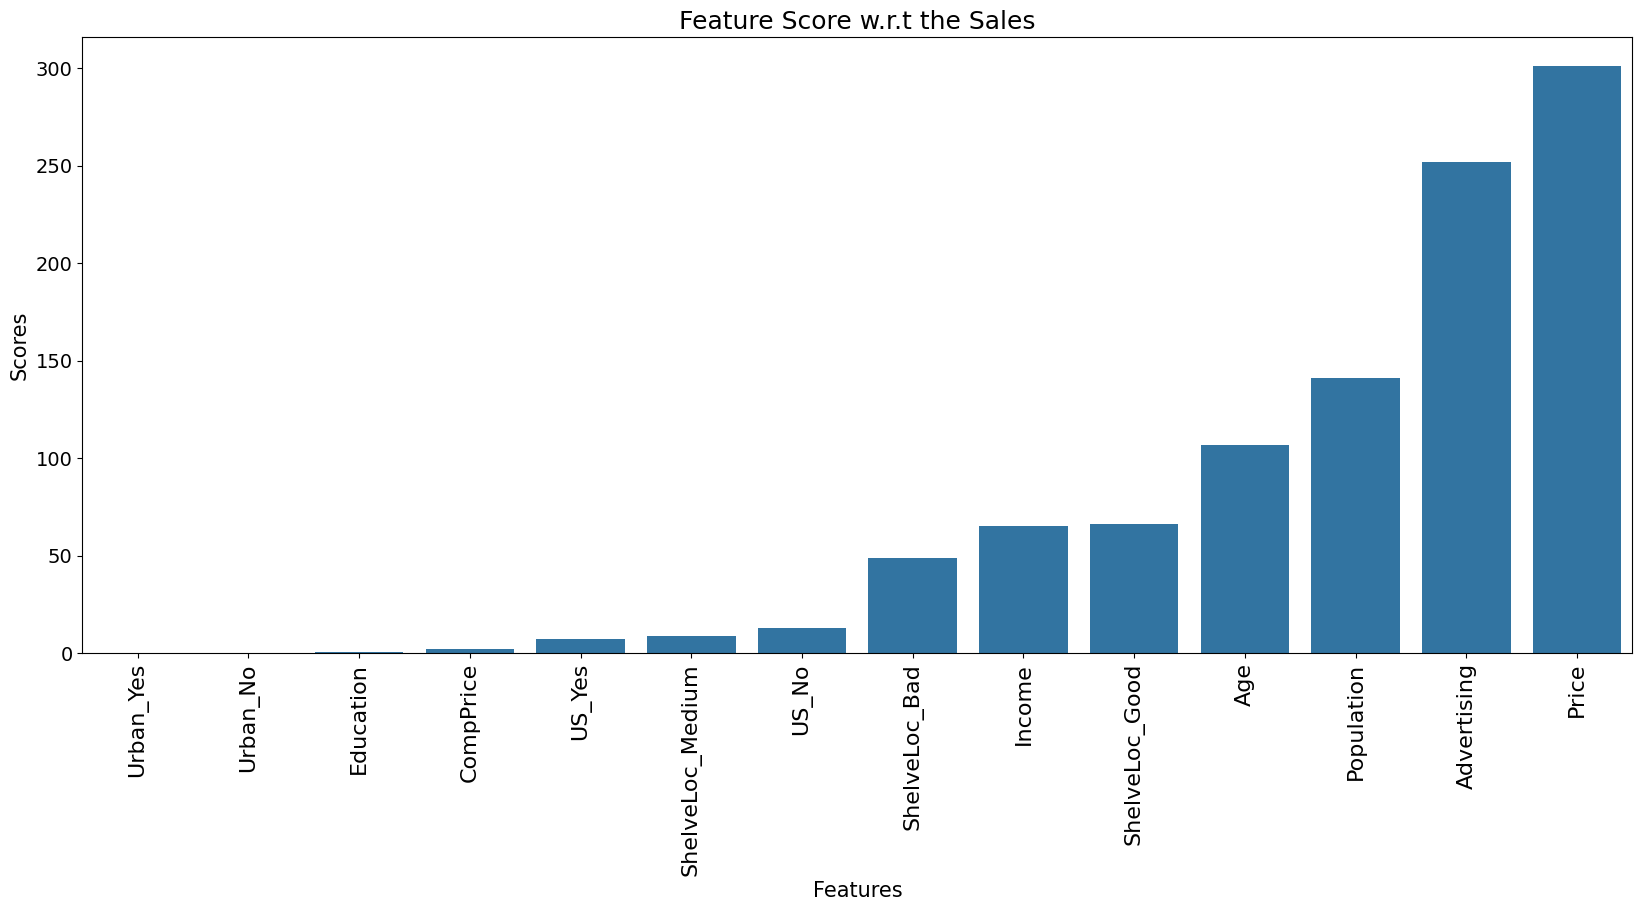

In [ ]:
plt.figure(figsize=(20,8))
# make barplot and sort bars
sns.barplot(x='Feature',
            y="Score",
            data=score_df,
            order=score_df.sort_values('Score').Feature)
# set labels
plt.xlabel("Features", size=15)
plt.ylabel("Scores", size=15)
plt.yticks(rotation = 0, fontsize = 14)
plt.xticks(rotation = 90, fontsize = 16)
plt.title("Feature Score w.r.t the Sales", size=18)
plt.show()

In [ ]:
model_data = data_[['Price', 'Advertising','Population', 'Income', 'Age', 'ShelveLoc_Good', 'ShelveLoc_Bad', 'ShelveLoc_Medium','Sales']]
model_data.head()

Price  Advertising  Population  Income  Age  ShelveLoc_Good  ShelveLoc_Bad  \
0    120           11         276      73   42               0              1   
1     83           16         260      48   65               1              0   
2     80           10         269      35   59               0              0   
3     97            4         466     100   55               0              0   
4    128            3         340      64   38               0              1   

   ShelveLoc_Medium  Sales  
0                 0      0  
1                 0      0  
2                 1      0  
3                 1      2  
4                 0      1

### Test Train Split With Imbalanced Dataset<a class="anchor" id="5.2"></a>



***Train Test Split*** : To have unknown datapoints to test the data rather than testing with the same points with which the model was trained. This helps capture the model performance much better.

![](https://cdn-images-1.medium.com/max/1600/1*-8_kogvwmL1H6ooN1A1tsQ.png)

***Cross Validation***: When model is split into training and testing it can be possible that specific type of data point may go entirely into either training or testing portion. This would lead the model to perform poorly. Hence over-fitting and underfitting problems can be well avoided with cross validation techniques

![](https://cdn-images-1.medium.com/max/1600/1*4G__SV580CxFj78o9yUXuQ.png)



In [ ]:
x = model_data.drop('Sales',axis=1)
y = model_data['Sales']

In [ ]:
y.unique()

array([0, 2, 1])

In [ ]:
# Create StratifiedKFold object.
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

# enumerate the splits and summarize the distributions
for train_ix, test_ix in skf.split(x, y):
# select rows
    train_X, test_X = x.iloc[train_ix], x.loc[test_ix]
    train_y, test_y = y.iloc[train_ix], y.iloc[test_ix]
# summarize train and test composition
counter_train = Counter(train_y)
counter_test = Counter(test_y)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 178, 0: 92, 1: 90}) Testing Data Counter({2: 20, 0: 10, 1: 10})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=0,stratify=y)

In [ ]:
# summarize train and test composition
counter_train = Counter(y_train)
counter_test = Counter(y_test)
print('Training Data',counter_train,'Testing Data',counter_test)

Training Data Counter({2: 139, 0: 71, 1: 70}) Testing Data Counter({2: 59, 0: 31, 1: 30})


In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


###  Grid search using Stratified Kfold Splits on Imbalanced Dataset<a class="anchor" id="6.1"></a>

In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(train_X, train_y)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(train_X, train_y)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=True)
print_score(tree_clf, train_X, train_y, test_X, test_y, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 4, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 65.83%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.750000   0.637500    0.636792  0.658333    0.674764   
recall      0.554348   0.566667    0.758427  0.658333    0.626480   
f1-score    0.637500   0.600000    0.692308  0.658333    0.643269   
support    92.000000  90.000000  178.000000  0.658333  360.000000   

           weighted avg  
precision      0.665900  
recall         0.658333  
f1-score       0.655224  
support      360.000000  
_______________________________________________
Confusion Matrix: 
 [[ 51   2  39]
 [  1  51  38]
 [ 16  27 135]]

Test Result:
Accuracy Score: 60.00%
_______________________________________________
CLASSIFICATION REPORT:
    

In [ ]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, train_X, train_y, cv=skf)
print(results.mean())

0.5999999999999999


In [ ]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(train_X,train_y)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [ ]:
grid.best_score_

0.663888888888889

In [ ]:
predict_output = model.predict(test_X)
accuracy_test = accuracy_score(test_y,predict_output)
accuracy_test

0.75

              precision    recall  f1-score   support

           0       0.67      0.40      0.50        10
           1       0.89      0.80      0.84        10
           2       0.72      0.90      0.80        20

    accuracy                           0.75        40
   macro avg       0.76      0.70      0.71        40
weighted avg       0.75      0.75      0.74        40



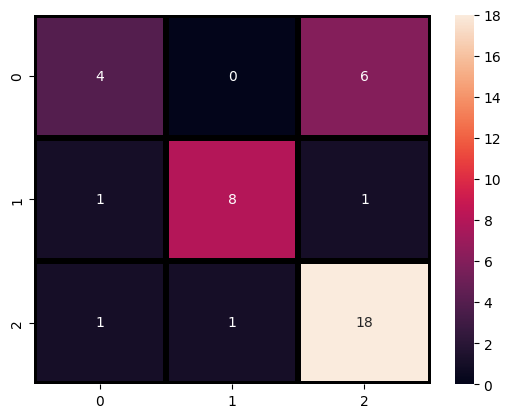

In [ ]:
sns.heatmap(confusion_matrix(test_y, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(test_y,predict_output))

### Grid search using Train Test Splits Stratifying Target feature on Imbalanced Dataset<a class="anchor" id="6.2"></a>

In [ ]:
params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 20))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 20)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=3)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 3 folds for each of 4332 candidates, totalling 12996 fits
Best paramters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 73.57%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1           2  accuracy   macro avg  \
precision   0.736842   0.670732    0.778689  0.735714    0.728754   
recall      0.788732   0.785714    0.683453  0.735714    0.752633   
f1-score    0.761905   0.723684    0.727969  0.735714    0.737853   
support    71.000000  70.000000  139.000000  0.735714  280.000000   

           weighted avg  
precision      0.741088  
recall         0.735714  
f1-score       0.735503  
support      280.000000  
_______________________________________________
Confusion Matrix: 
 [[56  0 15]
 [ 3 55 12]
 [17 27 95]]

Test Result:
Accuracy Score: 65.00%
_______________________________________________
CLASSIFICATION REPORT:
             

In [ ]:
# Get score for different values of n
decision_tree = DecisionTreeClassifier()
skf = StratifiedKFold(n_splits=10, shuffle=True, random_state=1)

results = cross_val_score(decision_tree, x_train, y_train, cv=skf)
print(results.mean())

0.6035714285714286


In [ ]:
param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,10)
}

grid = GridSearchCV(decision_tree,
                   param_grid = param_dict,
                   cv=skf,
                   verbose=1,
                   n_jobs=6)

grid.fit(x_train,y_train)

model = grid.best_estimator_

Fitting 10 folds for each of 1458 candidates, totalling 14580 fits


In [ ]:
grid.best_score_

0.6428571428571429

In [ ]:
predict_output = model.predict(x_test)
accuracy_test = accuracy_score(y_test,predict_output)
accuracy_test

0.6

              precision    recall  f1-score   support

           0       0.74      0.65      0.69        31
           1       0.48      0.43      0.46        30
           2       0.59      0.66      0.62        59

    accuracy                           0.60       120
   macro avg       0.60      0.58      0.59       120
weighted avg       0.60      0.60      0.60       120



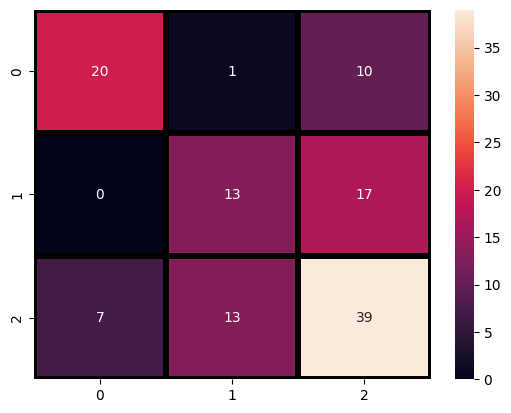

In [ ]:
sns.heatmap(confusion_matrix(y_test, predict_output),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,predict_output))

#### Observation:
+ In both the condition, due to imbalanced dataset our results are getting biased towards the majority. The model is correctly classifying all the majority classes yet fails to classify the minority classes. Hence, we need to use some kind of oversampling techniques to balance the dataset.

##  Handling imbalance data using SMOTE based techniques<a class="anchor" id="7"></a>

In [ ]:
x = model_data.drop(['Sales'], axis=1)
y = model_data['Sales']

x_train, x_test, y_train, y_test = train_test_split( x, y, test_size=0.30, random_state=0,stratify=y)

In [ ]:
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Shape of X_train:  (280, 8)
Shape of X_test:  (120, 8)
Shape of y_train:  (280,)
Shape of y_test (120,)


### SMOTE Oversampling technique<a class="anchor" id="7.1"></a>

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE
smt = SMOTE()
x_train_sm, y_train_sm = smt.fit_resample(x_train, y_train)

counter = Counter(y_train_sm)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({2: 139, 1: 139, 0: 139})


###  ADASYN: Adaptive Synthetic Sampling Approach<a class="anchor" id="7.2"></a>
ADASYN is a generalized form of the SMOTE algorithm. This algorithm also aims to oversample the minority class by generating synthetic instances for it. But the difference here is it considers the density distribution, ri which decides the no. of synthetic instances generated for samples which difficult to learn. Due to this, it helps in adaptively changing the decision boundaries based on the samples difficult to learn. This is the major difference compared to SMOTE.



In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using ADASYN
ada = ADASYN(random_state=130)
x_train_ada, y_train_ada = ada.fit_resample(x_train, y_train)

counter = Counter(y_train_ada)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 140, 2: 139, 0: 139})


### Hybridization: SMOTE + Tomek Links<a class="anchor" id="7.3"></a>
Hybridization techniques involve combining both undersampling and oversampling techniques. This is done to optimize the performance of classifier models for the samples created as part of these techniques.

SMOTE+TOMEK is such a hybrid technique that aims to clean overlapping data points for each of the classes distributed in sample space. After the oversampling is done by SMOTE, the class clusters may be invading each other’s space. As a result, the classifier model will be overfitting. Now, Tomek links are the opposite class paired samples that are the closest neighbors to each other. Therefore the majority of class observations from these links are removed as it is believed to increase the class separation near the decision boundaries. Now, to get better class clusters, Tomek links are applied to oversampled minority class samples done by SMOTE. Thus instead of removing the observations only from the majority class, we generally remove both the class observations from the Tomek links

In [ ]:
counter = Counter(y_train)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=139)
x_train_smtom, y_train_smtom = smtom.fit_resample(x_train, y_train)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({0: 128, 1: 127, 2: 118})


###Hybridization: SMOTE + ENN<a class="anchor" id="7.4"></a>
SMOTE + ENN is another hybrid technique where more no. of observations are removed from the sample space. Here, ENN is yet another undersampling technique where the nearest neighbors of each of the majority class is estimated. If the nearest neighbors misclassify that particular instance of the majority class, then that instance gets deleted.

Integrating this technique with oversampled data done by SMOTE helps in doing extensive data cleaning. Here on misclassification by NN’s samples from both the classes are removed. This results in a more clear and concise class separation.

<b>Python Code for SMOTE + ENN algorithm:

In [ ]:
counter = Counter(y_train)
print('Before',counter)
#oversampling the train dataset using SMOTE + ENN
smenn = SMOTEENN()
x_train_smenn, y_train_smenn = smenn.fit_resample(x_train, y_train)

counter = Counter(y_train_smenn)
print('After',counter)

Before Counter({2: 139, 0: 71, 1: 70})
After Counter({1: 64, 0: 61, 2: 12})


###  Performance Analysis after Resampling<a class="anchor" id="7.5"></a>

In [ ]:
sampled_data = {
    'ACTUAL':[x_train, y_train],
    'SMOTE':[x_train_sm, y_train_sm],
    'ADASYN':[x_train_ada, y_train_ada],
    'SMOTE_TOMEK':[x_train_smtom, y_train_smtom],
    'SMOTE_ENN':[x_train_smenn, y_train_smenn]
}

In [ ]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
    y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Confusion Matrix')
    print('='*60)
    #plot_confusion_matrix(clf_model, X_test, y_test)
    #plt.show()
    print(confusion_matrix(y_test,y_pred),"\n")
    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    #print('AUC-ROC')
    #print('='*60)
    #print(roc_auc_score(y_test, y_prob[:,1], multi_class='ovo'))

    #x = roc_auc_score(y_test, y_prob[:,1])
    f1 = f1_score(y_test, y_pred, average='micro')
    recall = recall_score(y_test, y_pred, average='micro')
    precision = precision_score(y_test, y_pred, average='micro')


    return algo,precision,recall,f1,sampling

In [ ]:
model_params = {
    'decision_tree' :{
        'model' :  DecisionTreeClassifier(),
        'params' : {
             'max_depth': [i for i in range(5,16,2)],
             'min_samples_split': [2, 5, 10, 15, 20, 50, 100],
             'min_samples_leaf': [1, 2, 5],
             'criterion': ['gini', 'entropy'],
             'max_features': ['log2', 'sqrt', 'auto']
        }

    }

}

In [ ]:
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
output = []
for model , model_hp in model_params.items():
    for resam , data in sampled_data.items():
        clf = RandomizedSearchCV(model_hp['model'], model_hp['params'],cv = cv, scoring='roc_auc', n_jobs=-1 )
        clf.fit(data[0], data[1])
        clf_best = clf.best_estimator_
        print('x'*60)
        print(model+' with ' + resam)
        print('='*60)
        output.append(test_eval(clf_best, x_test, y_test, model, resam))

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with ACTUAL
Confusion Matrix
[[18  0 13]
 [ 3 17 10]
 [15 14 30]] 

Classification Report
              precision    recall  f1-score   support

           0       0.50      0.58      0.54        31
           1       0.55      0.57      0.56        30
           2       0.57      0.51      0.54        59

    accuracy                           0.54       120
   macro avg       0.54      0.55      0.54       120
weighted avg       0.54      0.54      0.54       120
 

xxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxxx
decision_tree with SMOTE
Confusion Matrix
[[23  3  5]
 [ 1 20  9]
 [ 8 23 28]] 

Classification Report
              precision    recall  f1-score   support

           0       0.72      0.74      0.73        31
           1       0.43      0.67      0.53        30
           2       0.67      0.47      0.55        59

    accuracy                           0.59       120
   macro avg    

#### As the results can be compared, SMOTE TOMEK Hybridization technique gave the best results we are going to use it further

In [ ]:
counter = Counter(y)
print('Before',counter)
# oversampling the train dataset using SMOTE + Tomek
smtom = SMOTETomek(random_state=0)
x_train_smtom, y_train_smtom = smtom.fit_resample(x, y)

counter = Counter(y_train_smtom)
print('After',counter)

Before Counter({2: 198, 0: 102, 1: 100})
After Counter({1: 184, 0: 178, 2: 172})


In [ ]:
x_train,x_test,y_train,y_test = train_test_split(x_train_smtom,y_train_smtom,test_size=0.3,random_state=0, stratify=y_train_smtom)

counter = Counter(y_train_smtom)
print('Before',counter)
counter = Counter(y_train)
print('After',counter)
print("Shape of X_train: ",x_train.shape)
print("Shape of X_test: ", x_test.shape)
print("Shape of y_train: ",y_train.shape)
print("Shape of y_test",y_test.shape)

Before Counter({1: 184, 0: 178, 2: 172})
After Counter({1: 129, 0: 124, 2: 120})
Shape of X_train:  (373, 8)
Shape of X_test:  (161, 8)
Shape of y_train:  (373,)
Shape of y_test (161,)


## Pruning<a class="anchor" id="8"></a>
It is another method that can help us avoid overfitting. It helps in improving the performance of the tree by cutting the nodes or sub-nodes which are not significant. It removes the branches which have very low importance.

The performance of a tree can be further increased by pruning. It involves removing the branches that make use of features having low importance. This way, we reduce the complexity of tree, and thus increasing its predictive power by reducing overfitting.



In [ ]:
def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")

    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

params = {
    "criterion":("gini", "entropy"),
    "splitter":("best", "random"),
    "max_depth":(list(range(1, 6))),
    "min_samples_split":[2, 3, 4],
    "min_samples_leaf":list(range(1, 6)),
}


tree_clf = DecisionTreeClassifier(random_state=42)
tree_cv = GridSearchCV(tree_clf, params, scoring="accuracy", n_jobs=-1, verbose=1, cv=10)
tree_cv.fit(x_train, y_train)
best_params = tree_cv.best_params_
print(f"Best paramters: {best_params})")

tree_clf = DecisionTreeClassifier(**best_params)
tree_clf.fit(x_train, y_train)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=True)
print_score(tree_clf, x_train, y_train, x_test, y_test, train=False)

Fitting 10 folds for each of 300 candidates, totalling 3000 fits
Best paramters: {'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'})
Train Result:
Accuracy Score: 68.36%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1           2  accuracy   macro avg  \
precision    0.725926    0.790476    0.556391  0.683646    0.690931   
recall       0.790323    0.643411    0.616667  0.683646    0.683467   
f1-score     0.756757    0.709402    0.584980  0.683646    0.683713   
support    124.000000  129.000000  120.000000  0.683646  373.000000   

           weighted avg  
precision      0.693708  
recall         0.683646  
f1-score       0.685116  
support      373.000000  
_______________________________________________
Confusion Matrix: 
 [[98 10 16]
 [ 3 83 43]
 [34 12 74]]

Test Result:
Accuracy Score: 60.25%
_______________________________________________
CLASSIFICATION REPORT:
    

#### This is a balanced state of training and testing accuracy are close to each other where there is no overfitting or underfitting yet we can do better than this, let's try post pruning technique using <font color='red'><b>Alpha</b></font> Values

### Building Decision Tree Classifier using Entropy Criteria with Alpha values Post Pruning<a class="anchor" id="8.1"></a>

In [ ]:
model_entropy = DecisionTreeClassifier(criterion='entropy', random_state=0)
model_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

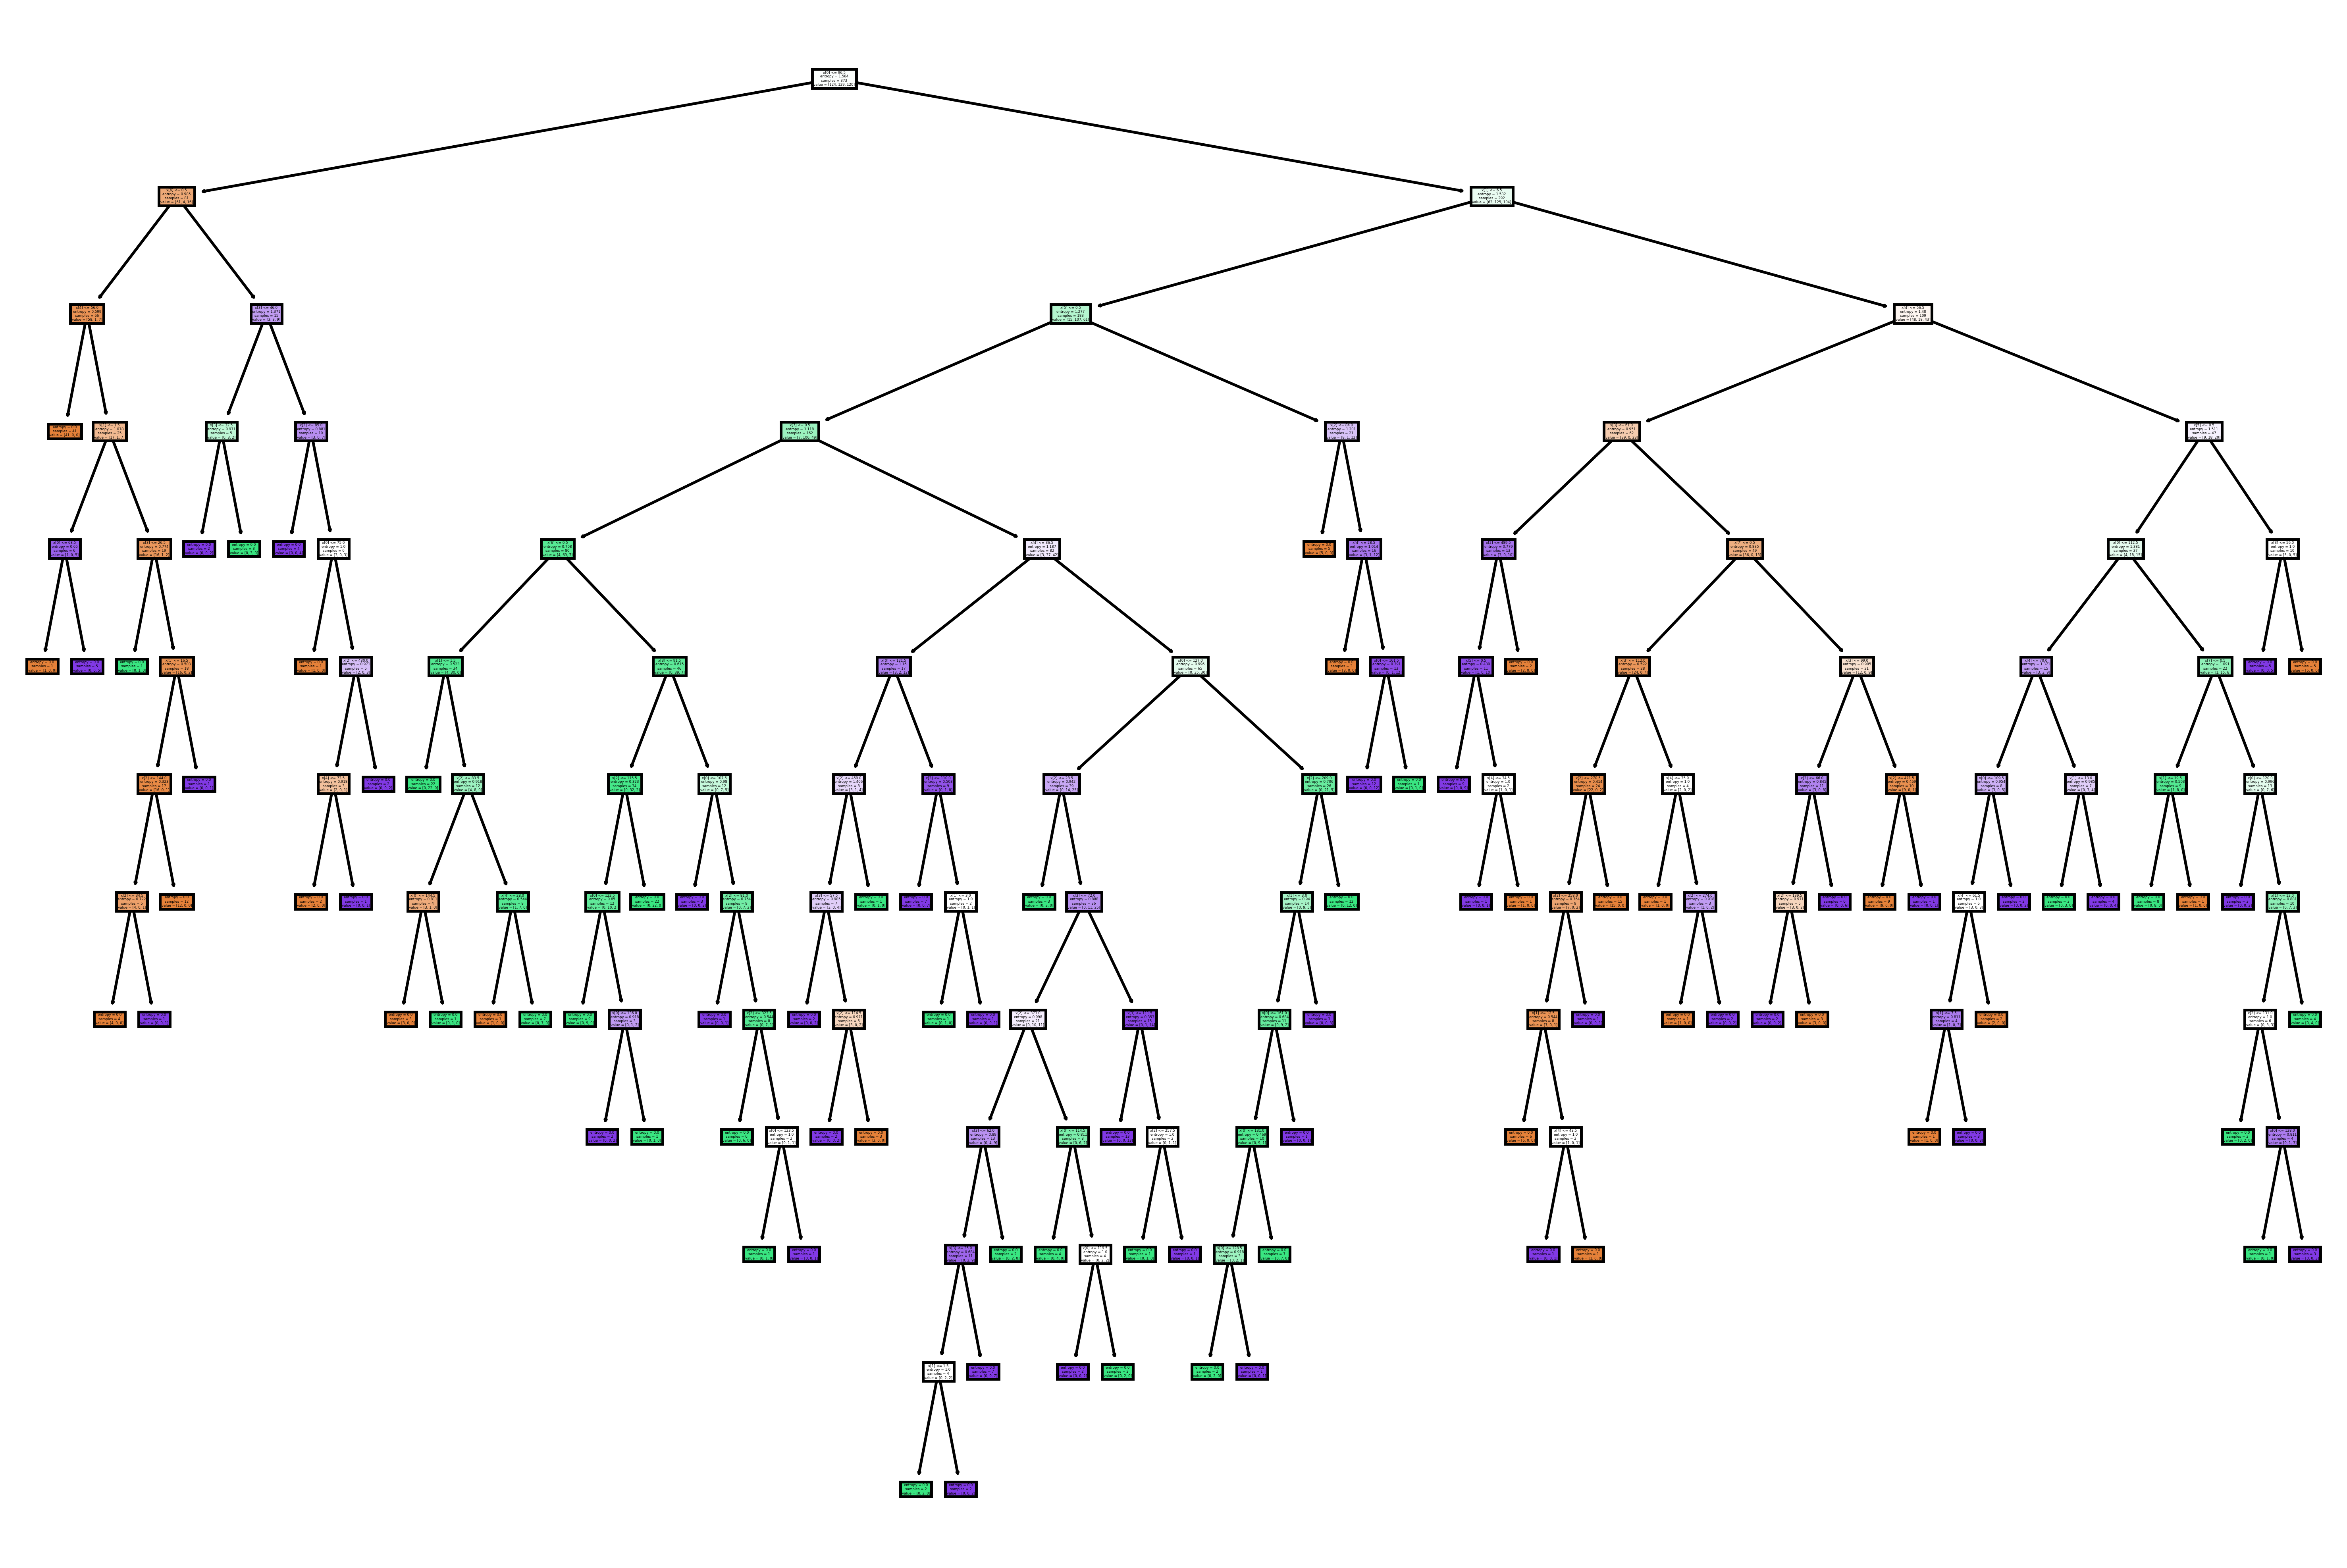

In [ ]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_entropy,filled=True)
plt.show()

In [ ]:
#Predicting on test data
preds = model_entropy.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

1    56
0    53
2    52
dtype: int64

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   0   1   2
Sales            
0      36   4  14
1       5  36  14
2      12  16  24

In [ ]:
# Accuracy
np.mean(preds==y_test)

0.5962732919254659

In [ ]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.68      0.67      0.67        54
           1       0.64      0.65      0.65        55
           2       0.46      0.46      0.46        52

    accuracy                           0.60       161
   macro avg       0.59      0.59      0.59       161
weighted avg       0.60      0.60      0.60       161



In [ ]:
path = model_entropy.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.17134342267896696


For the remainder of this example, we remove the last element in `clfs` and `ccp_alphas`, because it is the trivial tree with only one node. Here we show that the number of nodes and tree depth decreases as alpha increases.

####  Accuracy vs alpha for training and testing sets<a class="anchor" id="8.1.1"></a>
When `ccp_alpha` is set to zero and keeping the other default parameters of :class:`DecisionTreeClassifier`, the tree overfits, leading to a 100% training accuracy and 88% testing accuracy. As alpha increases, more of the tree is pruned, thus creating a decision tree that generalizes better. In this example, setting `ccp_alpha=0.015` maximizes the testing accuracy.

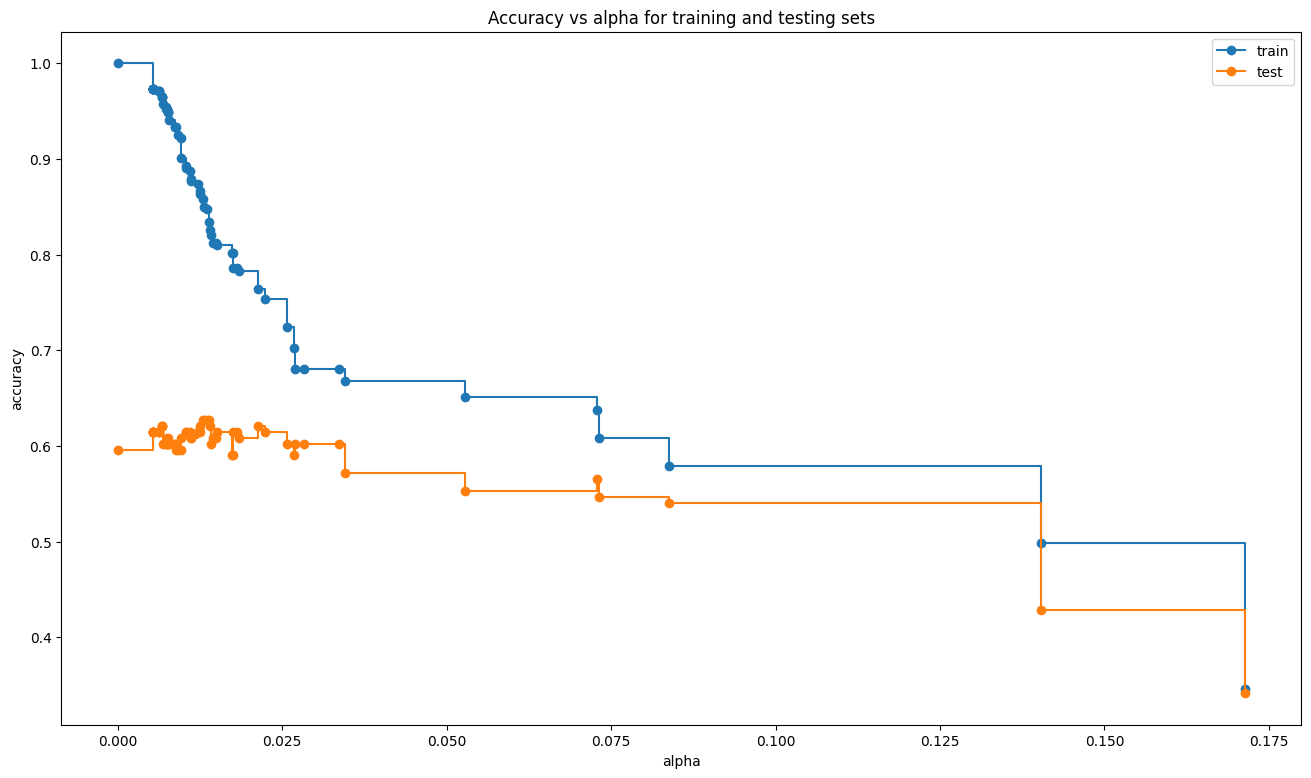

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
ccp_alphas

array([0.        , 0.00536193, 0.00536193, 0.00536193, 0.00536193,
       0.00536193, 0.00536193, 0.00536193, 0.0062868 , 0.00629629,
       0.00629629, 0.00678103, 0.00678103, 0.00678103, 0.00682348,
       0.00735505, 0.00738576, 0.00754131, 0.00759911, 0.00759911,
       0.007626  , 0.0078757 , 0.00870003, 0.00870003, 0.00884823,
       0.00924477, 0.00957582, 0.00970202, 0.0104215 , 0.01045612,
       0.01101722, 0.01107654, 0.01110792, 0.01214296, 0.01246496,
       0.01257361, 0.01301542, 0.01308468, 0.01363583, 0.01386342,
       0.01402853, 0.01420129, 0.01452909, 0.01493168, 0.01515274,
       0.01733081, 0.01748145, 0.01750441, 0.01808973, 0.01848954,
       0.02133578, 0.02237881, 0.02581192, 0.02674447, 0.02698787,
       0.02827313, 0.03366643, 0.0345913 , 0.05274258, 0.07284724,
       0.07322999, 0.08375109, 0.1403961 , 0.17134342])

#### Choosing the best value of **`cc_alpha`** where the testing and training accuracy are almost same or near or closer to each other

In [ ]:
clf = DecisionTreeClassifier(criterion='entropy',random_state=0, ccp_alpha=0.03366643)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.03366643, criterion='entropy',
                       random_state=0)

In [ ]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6809651474530831 
Testing Accuracy 0.6024844720496895


              precision    recall  f1-score   support

           0       0.64      0.76      0.69        54
           1       0.70      0.64      0.67        55
           2       0.45      0.40      0.42        52

    accuracy                           0.60       161
   macro avg       0.60      0.60      0.60       161
weighted avg       0.60      0.60      0.60       161



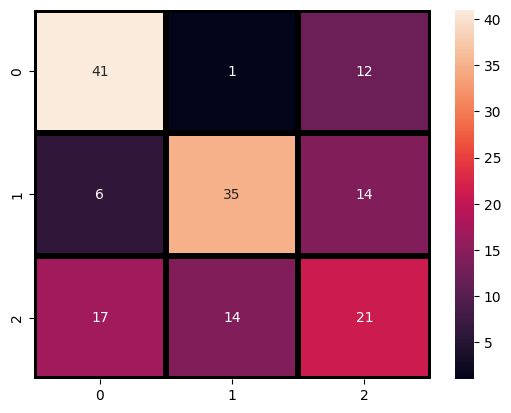

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

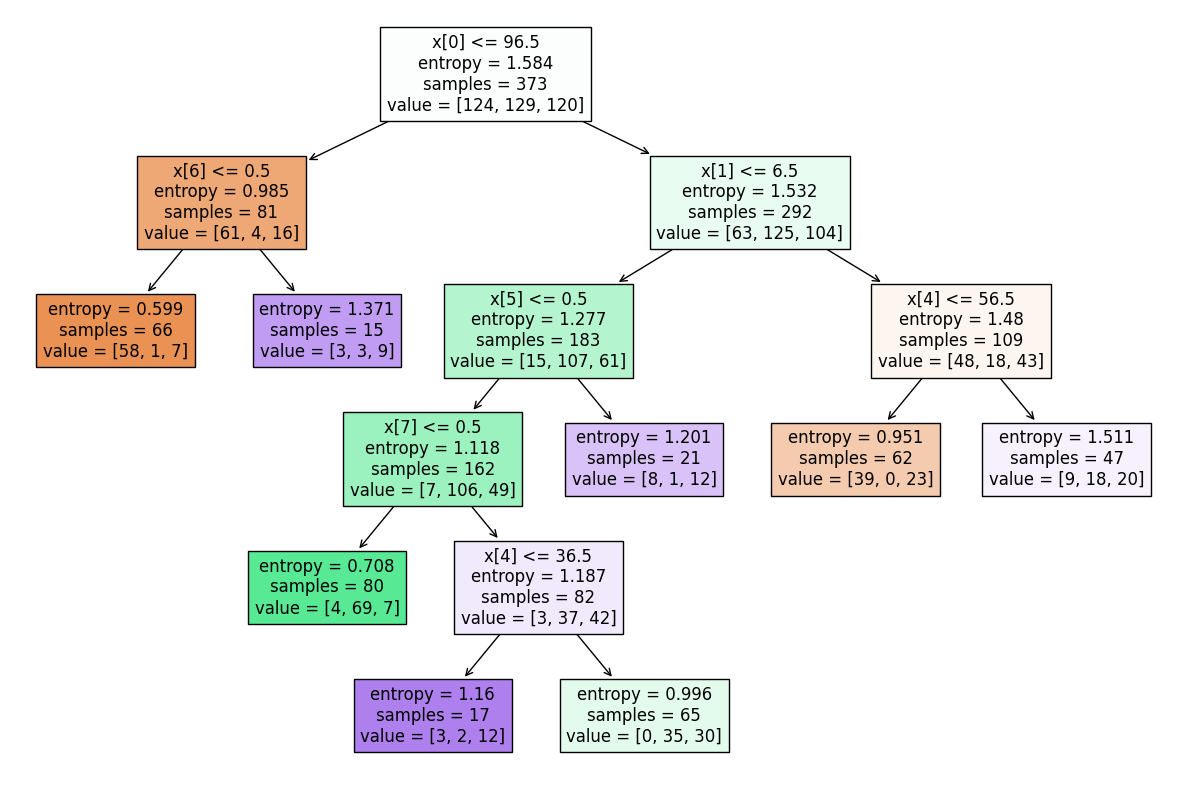

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()

### Building Decision Tree Classifier using Gini Criteria with Alpha values Post Pruning<a class="anchor" id="8.2"></a>

### Gini Index:
+ Gini index is a measure of impurity or purity used while creating a decision tree in the CART(Classification and Regression Tree) algorithm.
+ An attribute with the low Gini index should be preferred as compared to the high Gini index.
+ It only creates binary splits, and the CART algorithm uses the Gini index to create binary splits.
+ Gini index can be calculated using the below formula:

**`Gini Index= 1- ∑jPj2`**


In [ ]:
model_gini = DecisionTreeClassifier(criterion='gini', random_state=0)
model_gini.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

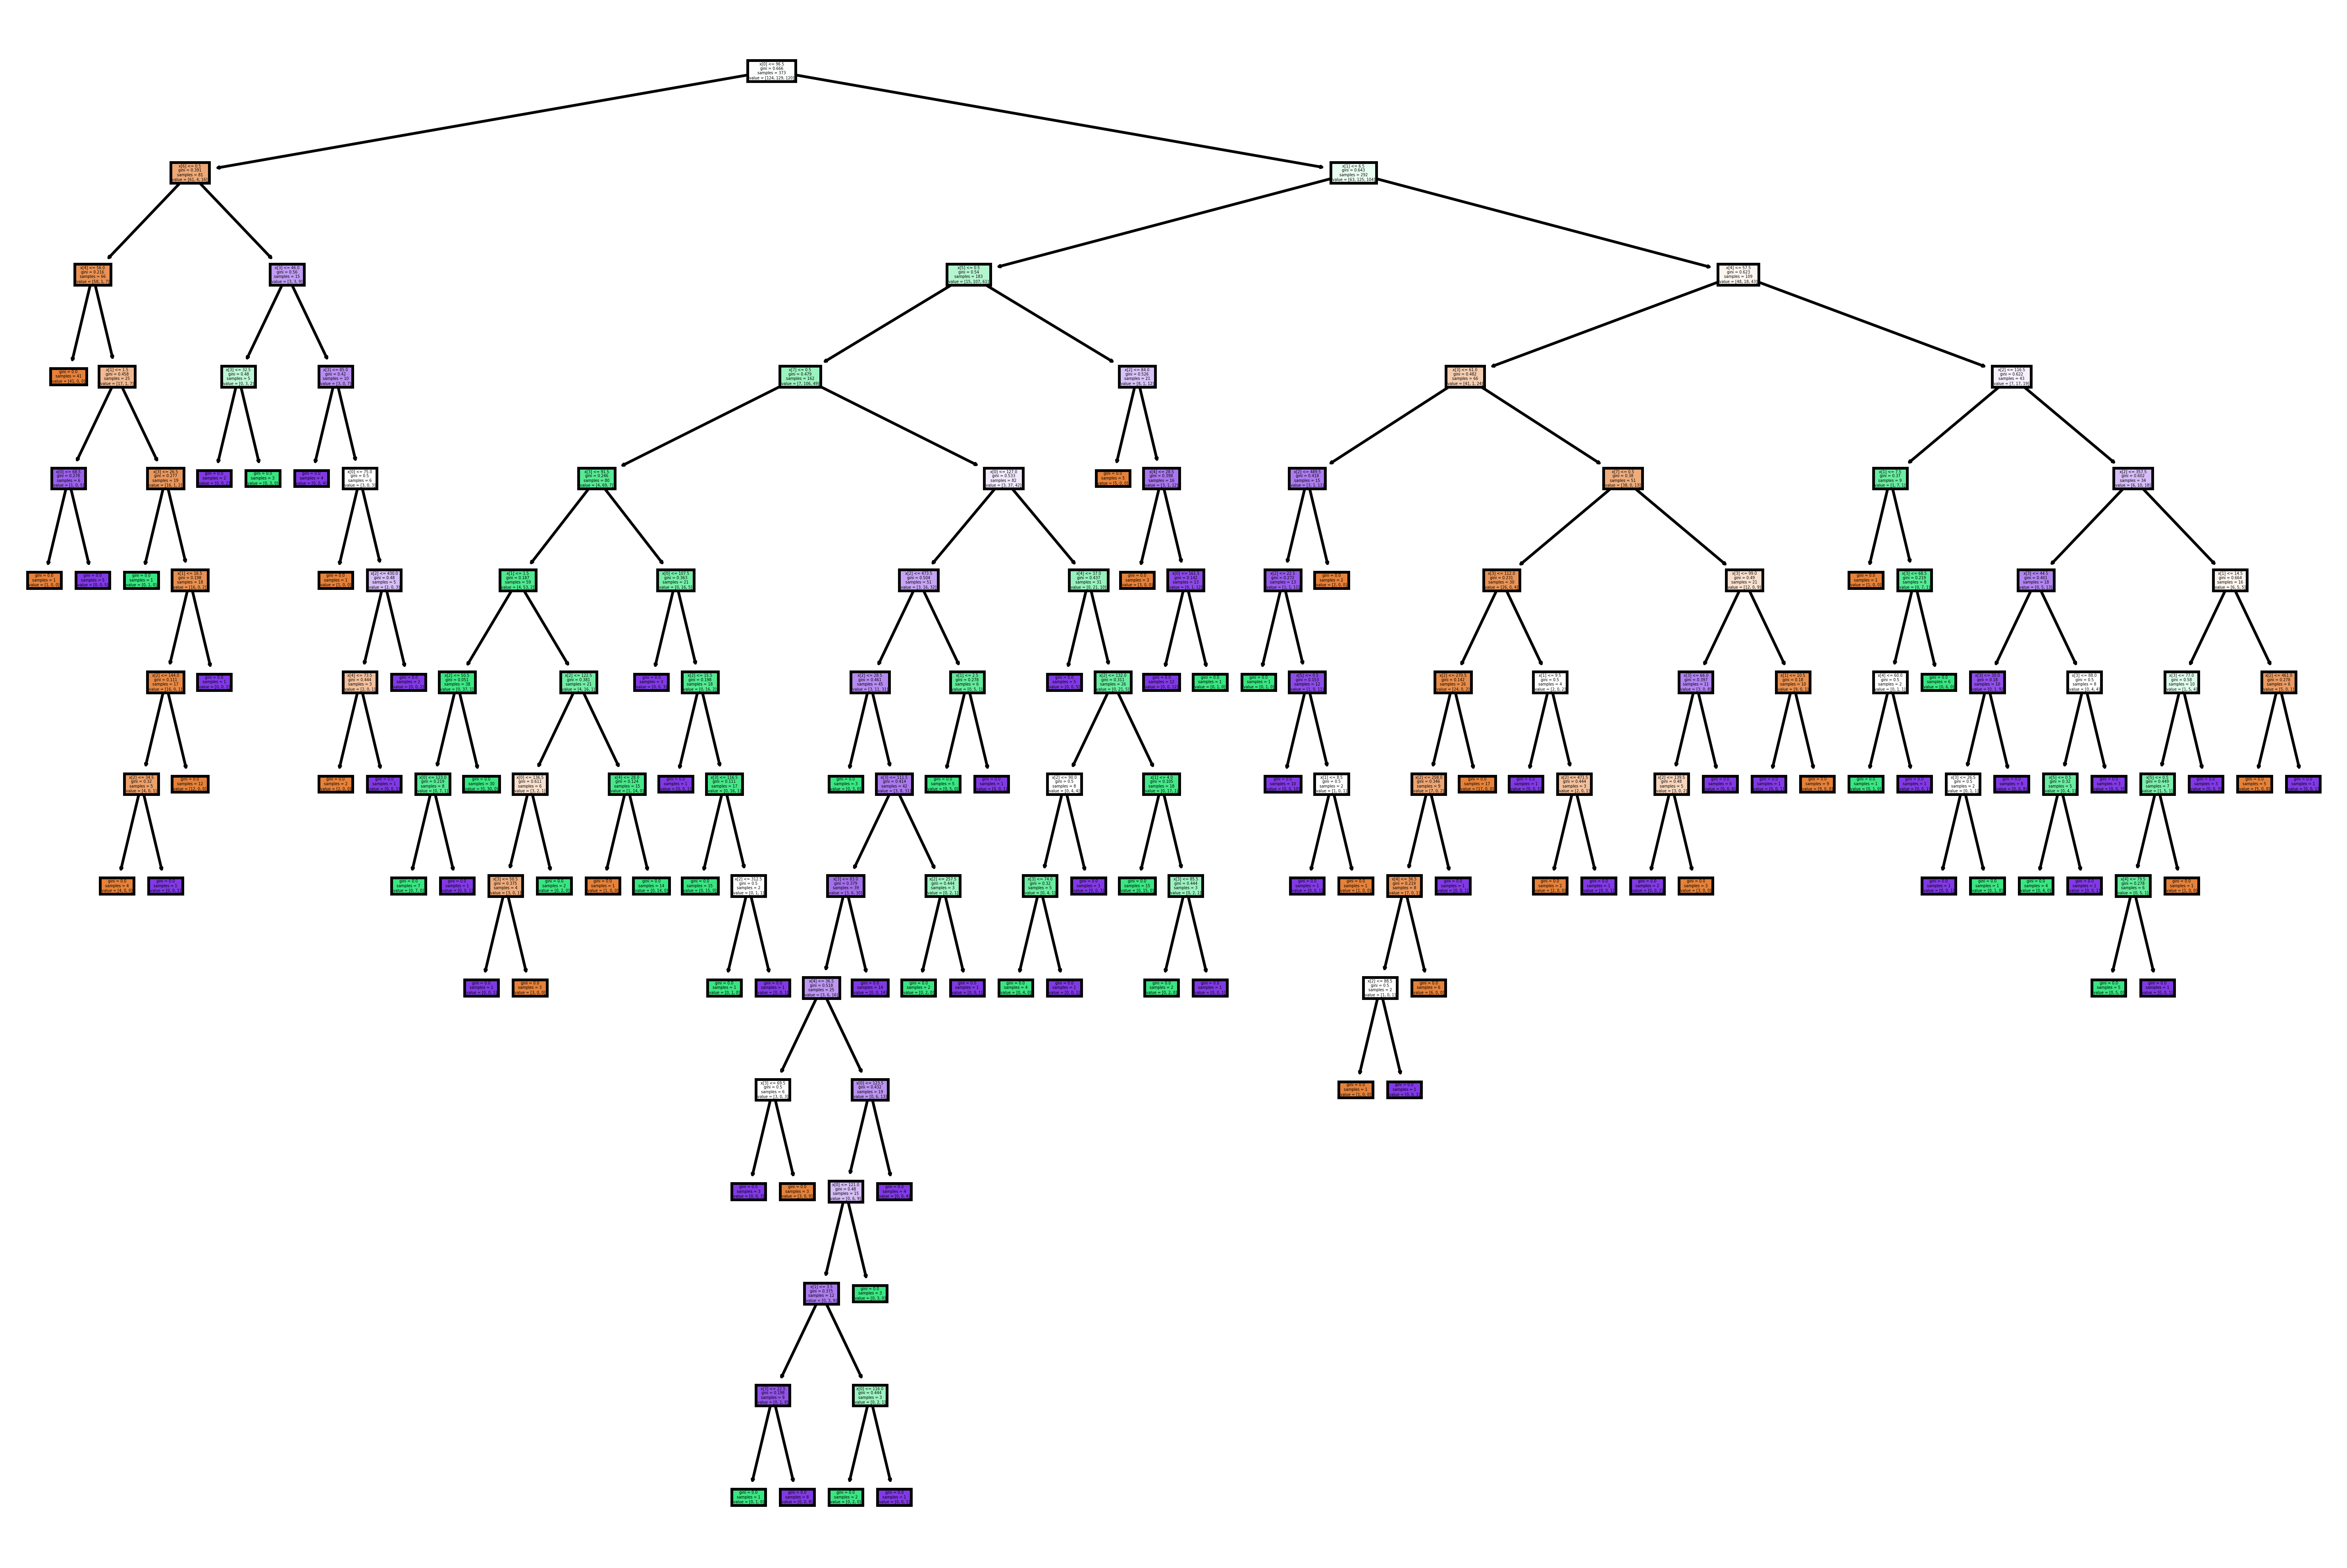

In [ ]:
plt.figure(figsize=(15,10),dpi=500)
tree.plot_tree(model_gini,filled=True)
plt.show()

In [ ]:
#Predicting on test data
preds = model_gini.predict(x_test) # predicting on test data set
pd.Series(preds).value_counts() # getting the count of each category

2    60
0    51
1    50
dtype: int64

In [ ]:
pd.crosstab(y_test,preds) # getting the 2 way table to understand the correct and wrong predictions

col_0   0   1   2
Sales            
0      37   2  15
1       4  37  14
2      10  11  31

In [ ]:
# Accuracy
np.mean(preds==y_test)

0.6521739130434783

In [ ]:
# Classification Report
print(classification_report(y_test,preds))

              precision    recall  f1-score   support

           0       0.73      0.69      0.70        54
           1       0.74      0.67      0.70        55
           2       0.52      0.60      0.55        52

    accuracy                           0.65       161
   macro avg       0.66      0.65      0.65       161
weighted avg       0.66      0.65      0.66       161



In [ ]:
path = model_gini.cost_complexity_pruning_path(x_train, y_train)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [ ]:
clfs = []
for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=ccp_alpha)
    clf.fit(x_train, y_train)
    clfs.append(clf)
print("Number of nodes in the last tree is: {} with ccp_alpha: {}".format(clfs[-1].tree_.node_count, ccp_alphas[-1]))

Number of nodes in the last tree is: 1 with ccp_alpha: 0.0777420178643562


####  Accuracy vs alpha for training and testing sets<a class="anchor" id="8.2.2"></a>


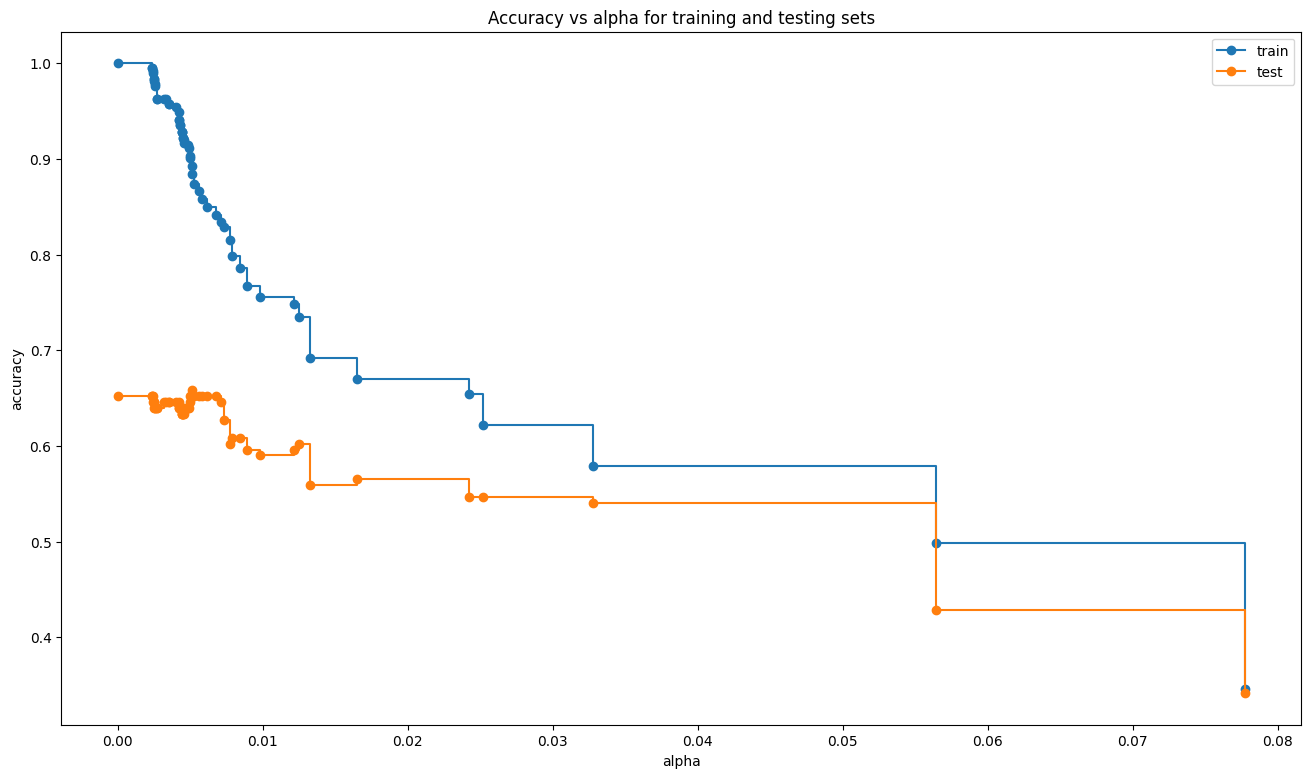

In [ ]:
train_scores = [clf.score(x_train, y_train) for clf in clfs]
test_scores = [clf.score(x_test, y_test) for clf in clfs]

fig, ax = plt.subplots(figsize=(16,9))
ax.set_xlabel("alpha")
ax.set_ylabel("accuracy")
ax.set_title("Accuracy vs alpha for training and testing sets")
ax.plot(ccp_alphas, train_scores, marker='o', label="train",
        drawstyle="steps-post")
ax.plot(ccp_alphas, test_scores, marker='o', label="test",
        drawstyle="steps-post")
ax.legend()
plt.show()

In [ ]:
ccp_alphas

array([0.        , 0.00234584, 0.00234584, 0.00241287, 0.00245755,
       0.00252326, 0.00252326, 0.00253202, 0.00260363, 0.00261041,
       0.00268097, 0.00268097, 0.00321716, 0.00332715, 0.00357462,
       0.00357462, 0.00402145, 0.00421295, 0.00424486, 0.00424486,
       0.00428954, 0.00428954, 0.00446828, 0.00446828, 0.00446828,
       0.0044858 , 0.0044858 , 0.00457139, 0.00457802, 0.00482574,
       0.00494947, 0.0049739 , 0.00500447, 0.00512362, 0.00512673,
       0.00525274, 0.00563003, 0.00584938, 0.00615018, 0.00679437,
       0.00712371, 0.00731422, 0.00775027, 0.00788275, 0.0084123 ,
       0.00895157, 0.00984303, 0.01214168, 0.01252713, 0.01324466,
       0.01648435, 0.02421173, 0.02518644, 0.03279996, 0.05644837,
       0.07774202])

#### Choosing the best value of **`cc_alpha`** where the testing and training accuracy are almost same or near or closer to each other

In [ ]:
clf = DecisionTreeClassifier(criterion='gini',random_state=0, ccp_alpha=0.02518644)
clf.fit(x_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.02518644, random_state=0)

In [ ]:
pred_test=clf.predict(x_test)
pred_train=clf.predict(x_train)
from sklearn.metrics import accuracy_score
print('Training Accuracy',accuracy_score(y_train, pred_train),'\n'
'Testing Accuracy',accuracy_score(y_test, pred_test))

Training Accuracy 0.6219839142091153 
Testing Accuracy 0.546583850931677


              precision    recall  f1-score   support

           0       0.51      0.93      0.66        54
           1       0.83      0.35      0.49        55
           2       0.47      0.37      0.41        52

    accuracy                           0.55       161
   macro avg       0.60      0.55      0.52       161
weighted avg       0.61      0.55      0.52       161



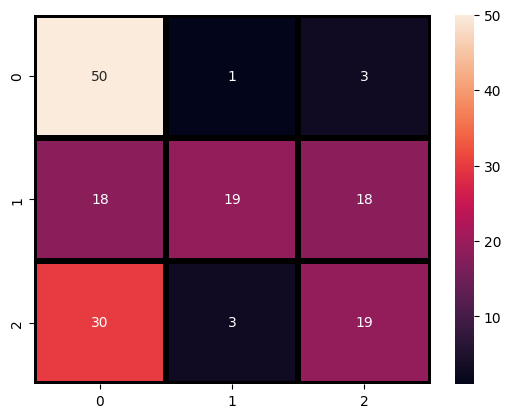

In [ ]:
sns.heatmap(confusion_matrix(y_test, pred_test),annot=True,fmt = "d",linecolor="k",linewidths=3)
print(classification_report(y_test,pred_test))

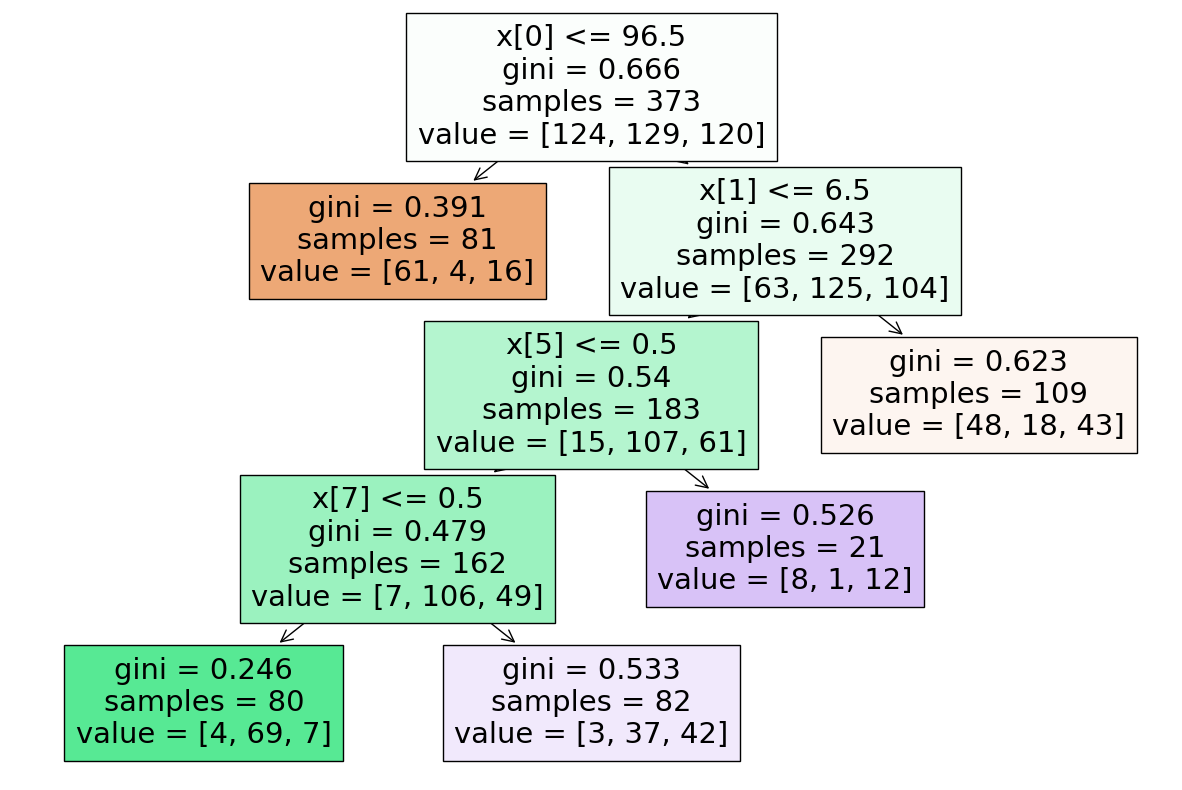

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf,filled=True)
plt.show()